In [2]:
import pandas as pd

file_path = "Simplified_Ath_Data3.csv"
df = pd.read_csv(file_path)
df

,Age,Concussion Number,PCS Symptom Severity,Total MFQ Score,Headache,Dizziness,Mentally Foggy,Sadness,Sex_Female,Sex_Male,Sport_Cheerleading,Sport_Hockey,Sport_Lacrosse,Sport_Rugby,Sport_Soccer,Concussion History_No,Concussion History_Yes,Depression Diagnosis_No,Depression Diagnosis_Yes
0,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,0,0,1,0,0,0,0,1,1,0
1,0.0,0.666667,0.000000,0.094340,0.000000,0.000000,0.000000,0.0,1,0,0,1,0,0,0,0,1,1,0
2,0.2,0.333333,0.000000,0.075472,0.000000,0.000000,0.000000,0.0,1,0,0,0,0,1,0,0,1,1,0
3,0.2,0.333333,0.259615,0.188679,0.666667,0.000000,0.000000,0.0,1,0,0,0,0,1,0,0,1,1,0
4,0.4,0.333333,0.009615,0.018868,0.000000,0.000000,0.000000,0.0,1,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.4,0.000000,0.125000,0.000000,0.000000,0.000000,0.166667,0.0,0,1,0,1,0,0,0,1,0,1,0
144,0.0,0.000000,0.230769,0.188679,0.666667,0.000000,0.000000,0.0,0,1,0,0,0,0,1,1,0,0,1
145,0.6,0.333333,0.115385,0.150943,0.000000,0.000000,0.000000,0.0,0,1,0,0,1,0,0,0,1,0,1
146,0.8,0.333333,0.000000,0.094340,0.000000,0.000000,0.000000,0.0,0,1,0,0,1,0,0,0,1,0,1


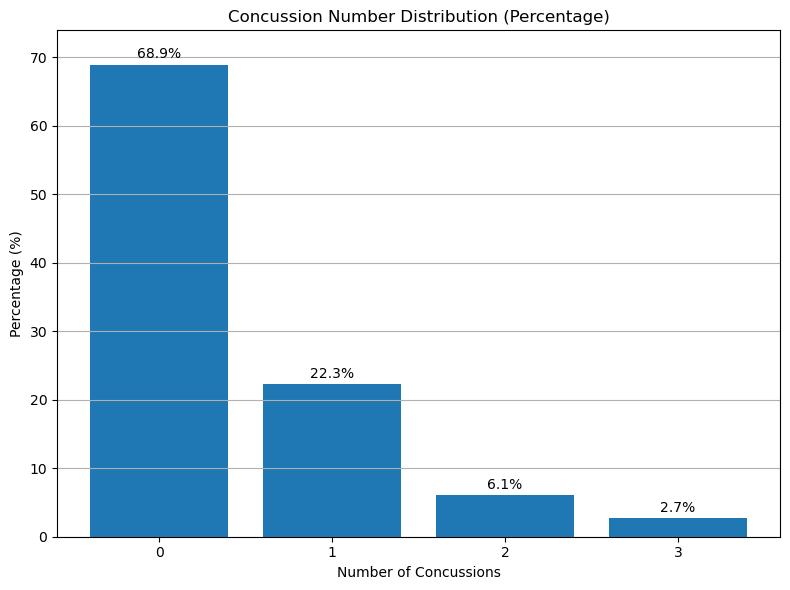

In [4]:
# Re-import libraries and reload dataset after environment reset
import pandas as pd
import matplotlib.pyplot as plt

# Map concussion number values for clean x-axis
concussion_number_mapping = {
    0.0: '0',
    0.33333: '1',
    0.66667: '2',
    1.0: '3'
}

# Create a labeled column for clarity
df['Concussion Number Label'] = df['Concussion Number'].round(5).map(concussion_number_mapping)

# Calculate percentage distribution
concussion_counts = df['Concussion Number Label'].value_counts().sort_index()
concussion_percentages = (concussion_counts / concussion_counts.sum()) * 100

# Plot the distribution with clear labels and percentage on top
plt.figure(figsize=(8, 6))
bars = plt.bar(concussion_percentages.index, concussion_percentages.values)

# Annotate with percentage values
for bar, percentage in zip(bars, concussion_percentages.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Concussion Number Distribution (Percentage)')
plt.xlabel('Number of Concussions')
plt.ylabel('Percentage (%)')
plt.ylim(0, concussion_percentages.max() + 5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


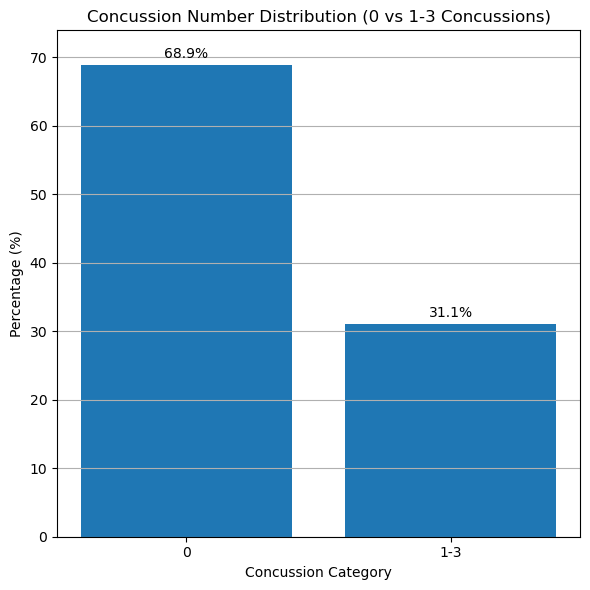

In [5]:
# Re-map concussion number to combine 1, 2, 3 into "1-3"
concussion_number_combined_mapping = {
    0.0: '0',
    0.33333: '1-3',
    0.66667: '1-3',
    1.0: '1-3'
}

# Apply the combined mapping
df['Concussion Number Combined'] = df['Concussion Number'].round(5).map(concussion_number_combined_mapping)

# Calculate new percentage distribution
combined_counts = df['Concussion Number Combined'].value_counts().sort_index()
combined_percentages = (combined_counts / combined_counts.sum()) * 100

# Plot the combined distribution with clear labels
plt.figure(figsize=(6, 6))
bars = plt.bar(combined_percentages.index, combined_percentages.values)

# Annotate with percentages
for bar, percentage in zip(bars, combined_percentages.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Concussion Number Distribution (0 vs 1-3 Concussions)')
plt.xlabel('Concussion Category')
plt.ylabel('Percentage (%)')
plt.ylim(0, combined_percentages.max() + 5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


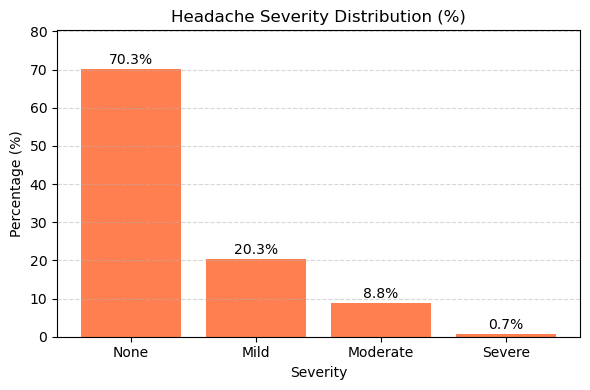

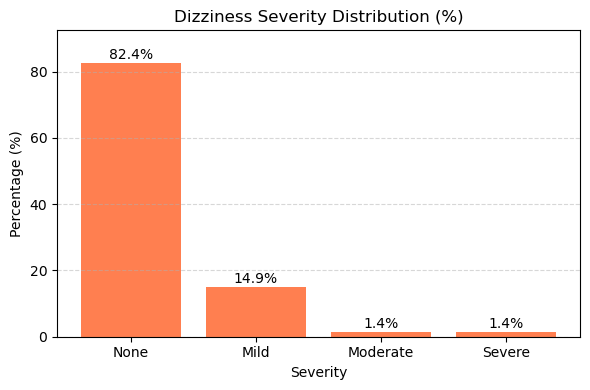

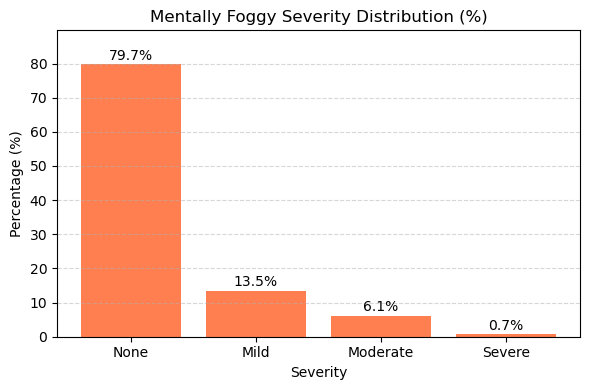

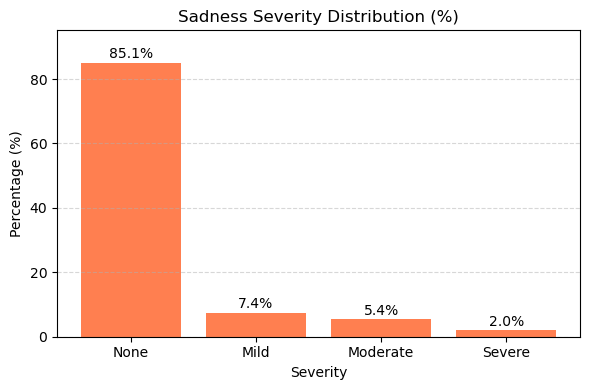

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define symptom variables and their categories
symptom_vars = ["Headache", "Dizziness", "Mentally Foggy", "Sadness"]
category_labels = ["None", "Mild", "Moderate", "Severe"]

# Function to map scaled symptom values (0-1) into categories
def categorize_symptom(value):
    if value == 0:
        return "None"
    elif value <= 2/6:
        return "Mild"
    elif value <= 4/6:
        return "Moderate"
    else:
        return "Severe"

# Apply categorization
categorized_df = df.copy()
for var in symptom_vars:
    categorized_df[var + "_Category"] = categorized_df[var].apply(categorize_symptom)

# Plot frequency distribution with percentages for each symptom variable
for var in symptom_vars:
    counts = categorized_df[var + "_Category"].value_counts().reindex(category_labels, fill_value=0)
    percentages = (counts / counts.sum()) * 100

    plt.figure(figsize=(6, 4))
    bars = plt.bar(category_labels, percentages, color='coral')

    # Annotate bars with percentages
    for bar, pct in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
                 f'{pct:.1f}%', ha='center', va='bottom')

    plt.title(f"{var} Severity Distribution (%)")
    plt.xlabel("Severity")
    plt.ylabel("Percentage (%)")
    plt.ylim(0, percentages.max() + 10)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

plt.show()

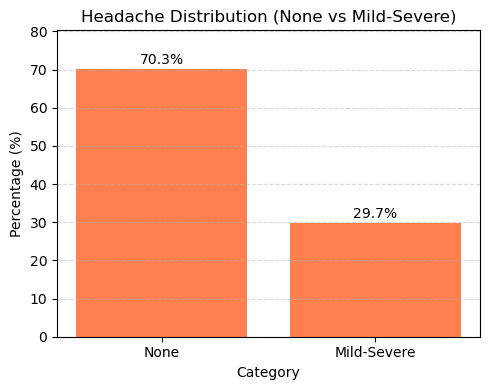

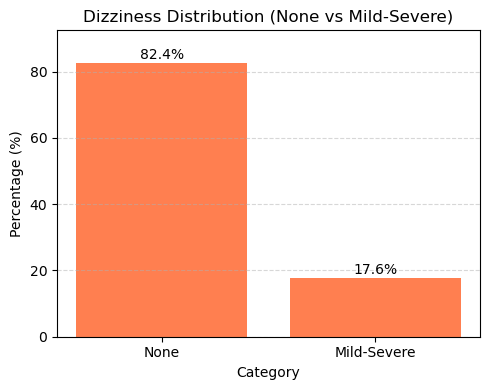

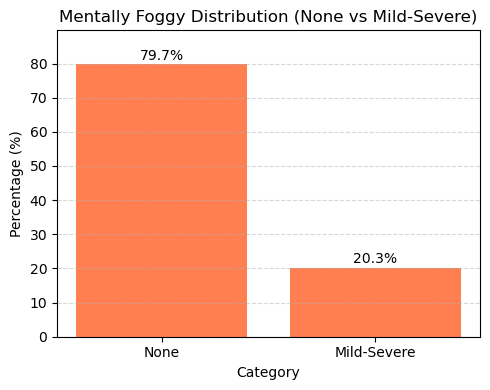

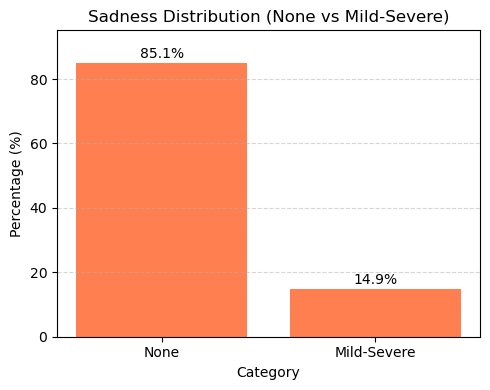

In [7]:
# Define symptom variables
symptom_vars = ["Headache", "Dizziness", "Mentally Foggy", "Sadness"]

# Function to map into "None" vs "Mild-Severe"
def categorize_binary(value):
    if value == 0:
        return "None"
    else:
        return "Mild-Severe"

# Apply binary categorization
categorized_df = df.copy()
for var in symptom_vars:
    categorized_df[var + "_Binary"] = categorized_df[var].apply(categorize_binary)

# Plot binary grouped distributions with percentages
for var in symptom_vars:
    counts = categorized_df[var + "_Binary"].value_counts().reindex(["None", "Mild-Severe"], fill_value=0)
    percentages = (counts / counts.sum()) * 100

    plt.figure(figsize=(5, 4))
    bars = plt.bar(percentages.index, percentages.values, color='coral')

    # Annotate bars with percentage labels
    for bar, pct in zip(bars, percentages.values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
                 f'{pct:.1f}%', ha='center', va='bottom')

    plt.title(f"{var} Distribution (None vs Mild-Severe)")
    plt.xlabel("Category")
    plt.ylabel("Percentage (%)")
    plt.ylim(0, percentages.max() + 10)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

plt.show()

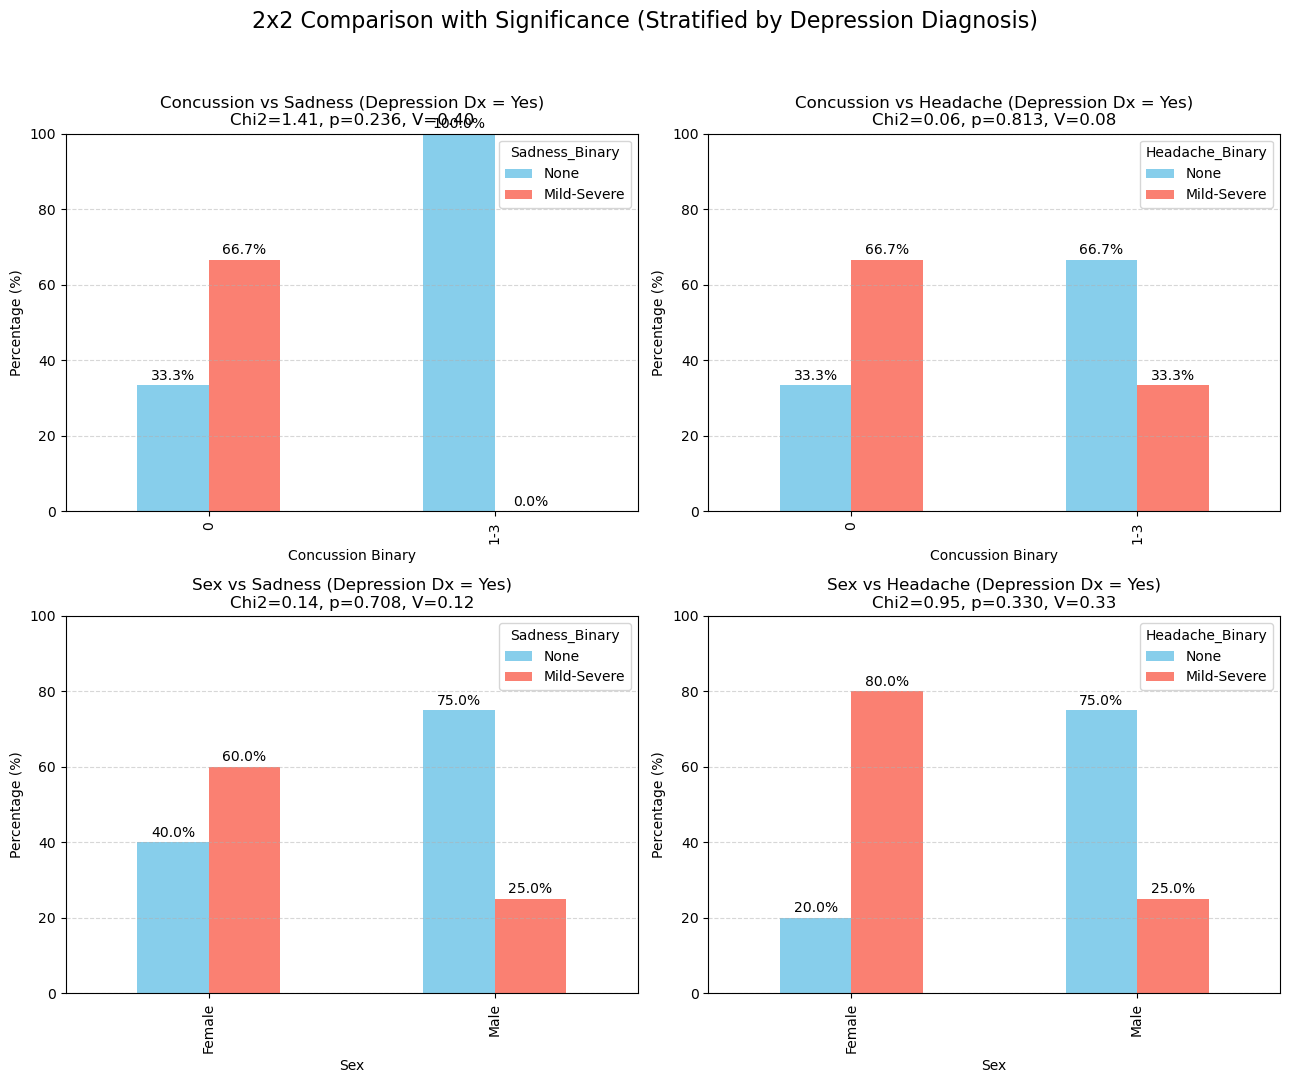

In [9]:
# Reload cleanly for precise depression diagnosis stratification visualization
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create binary and categorical variables needed
df['Concussion Binary'] = df['Concussion Number'].round(5).apply(lambda x: '0' if x == 0.0 else '1-3')
df['Sex'] = df['Sex_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')
df['Sadness_Binary'] = df['Sadness'].apply(lambda x: 'None' if x == 0 else 'Mild-Severe')
df['Headache_Binary'] = df['Headache'].apply(lambda x: 'None' if x == 0 else 'Mild-Severe')
df['Depression Diagnosis'] = df['Depression Diagnosis_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Prepare stratified plotting
fig, axs = plt.subplots(2, 2, figsize=(13, 11))
fig.suptitle('2x2 Comparison with Significance (Stratified by Depression Diagnosis)', fontsize=16)

plot_settings = [
    ('Concussion Binary', 'Sadness_Binary', axs[0, 0], 'Concussion vs Sadness'),
    ('Concussion Binary', 'Headache_Binary', axs[0, 1], 'Concussion vs Headache'),
    ('Sex', 'Sadness_Binary', axs[1, 0], 'Sex vs Sadness'),
    ('Sex', 'Headache_Binary', axs[1, 1], 'Sex vs Headache'),
]

# Iterate for each comparison and plot stratified by depression diagnosis
for var1, var2, ax, title in plot_settings:
    # Filter only participants with depression diagnosis
    subset_df = df[df['Depression Diagnosis'] == 'Yes']

    # Create contingency table and calculate chi-square and Cramér's V
    contingency_table = pd.crosstab(subset_df[var1], subset_df[var2])
    chi2, p, dof, _ = stats.chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

    # Normalized frequency table for plotting
    crosstab_norm = pd.crosstab(subset_df[var1], subset_df[var2], normalize='index') * 100
    crosstab_norm = crosstab_norm[['None', 'Mild-Severe']]

    # Plot as side-by-side bar chart
    crosstab_norm.plot(kind='bar', stacked=False, ax=ax, color=['skyblue', 'salmon'])
    ax.set_title(f"{title} (Depression Dx = Yes)\nChi2={chi2:.2f}, p={p:.3f}, V={cramers_v:.2f}")
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel(var1)
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Annotate percentage labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


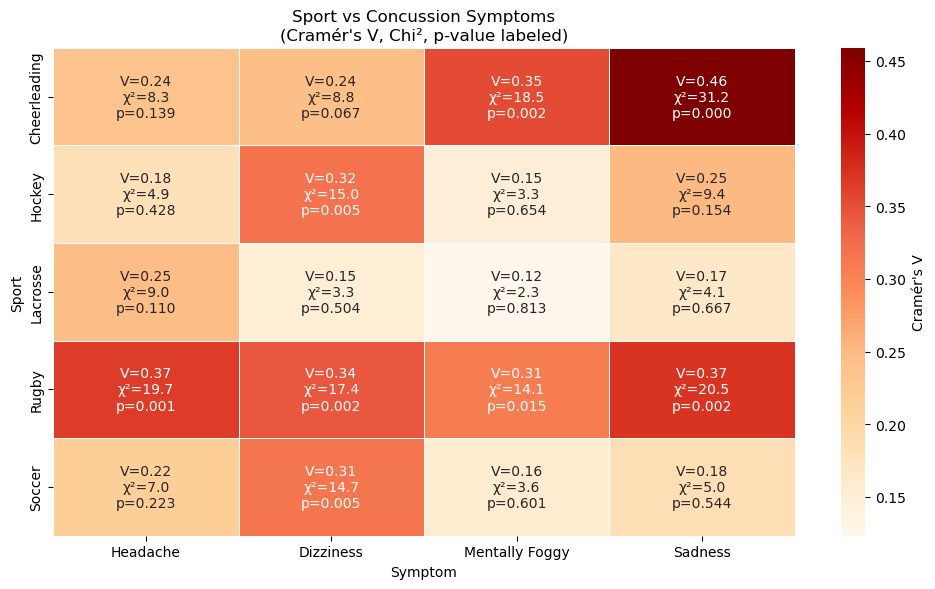

In [14]:
# Reload and prepare for clean sport vs concussion symptom heatmap with labels
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Identify sport columns
sport_columns = [col for col in df.columns if col.startswith('Sport_')]
symptom_vars = ['Headache', 'Dizziness', 'Mentally Foggy', 'Sadness']

# Prepare a matrix to store annotations and Cramér's V values
heatmap_matrix = pd.DataFrame(index=[sport.replace('Sport_', '') for sport in sport_columns],
                              columns=symptom_vars, dtype=float)
annotations_matrix = pd.DataFrame(index=heatmap_matrix.index,
                                   columns=heatmap_matrix.columns, dtype=str)

# Calculate chi-square, p-value, and Cramér's V for each sport vs each symptom
for sport_col in sport_columns:
    sport_label = sport_col.replace('Sport_', '')
    for symptom in symptom_vars:
        contingency_table = pd.crosstab(df[sport_col], df[symptom])
        chi2, p, dof, _ = stats.chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        if (n * (min(contingency_table.shape) - 1)) != 0:
            cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        else:
            cramers_v = np.nan  # handle division by zero

        # Fill matrices
        heatmap_matrix.loc[sport_label, symptom] = cramers_v
        annotations_matrix.loc[sport_label, symptom] = f"V={cramers_v:.2f}\nχ²={chi2:.1f}\np={p:.3f}"

# Plot the heatmap with annotations
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_matrix,
            annot=annotations_matrix,
            fmt='',
            cmap='OrRd',
            linewidths=0.5,
            linecolor='white',
            cbar_kws={'label': "Cramér's V"})

plt.title("Sport vs Concussion Symptoms\n(Cramér's V, Chi², p-value labeled)")
plt.ylabel("Sport")
plt.xlabel("Symptom")
plt.tight_layout()
plt.show()

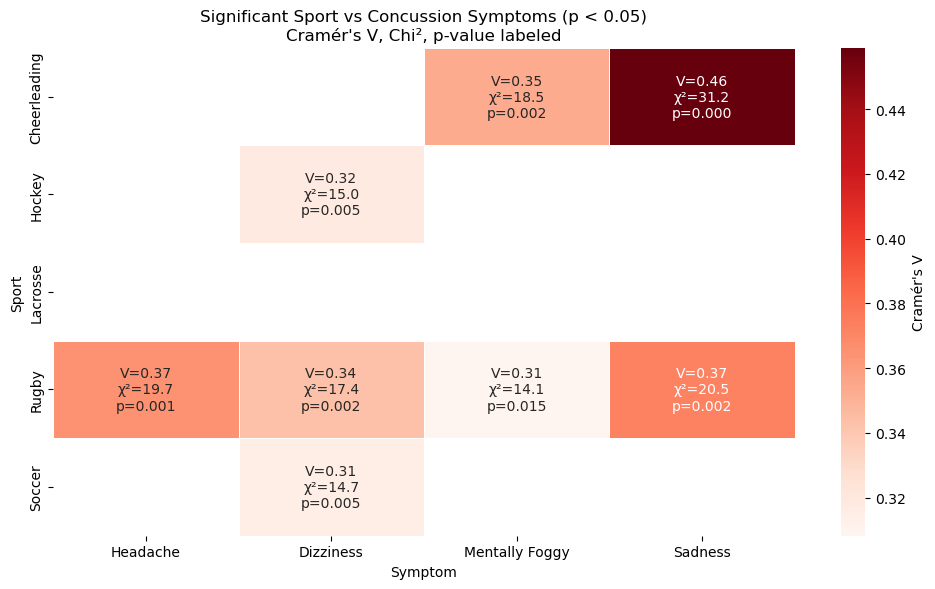

In [15]:
# Regenerate the heatmap with a threshold for p < 0.05 for clear focus

# Prepare filtered matrices showing only significant associations
significant_heatmap_matrix = heatmap_matrix.copy()
significant_annotations_matrix = annotations_matrix.copy()

# Recalculate to enforce threshold filtering
for sport_col in sport_columns:
    sport_label = sport_col.replace('Sport_', '')
    for symptom in symptom_vars:
        contingency_table = pd.crosstab(df[sport_col], df[symptom])
        chi2, p, dof, _ = stats.chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        if (n * (min(contingency_table.shape) - 1)) != 0:
            cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        else:
            cramers_v = np.nan

        if p < 0.05:
            significant_heatmap_matrix.loc[sport_label, symptom] = cramers_v
            significant_annotations_matrix.loc[sport_label, symptom] = f"V={cramers_v:.2f}\nχ²={chi2:.1f}\np={p:.3f}"
        else:
            significant_heatmap_matrix.loc[sport_label, symptom] = np.nan
            significant_annotations_matrix.loc[sport_label, symptom] = ""

# Plot the thresholded heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(significant_heatmap_matrix,
            annot=significant_annotations_matrix,
            fmt='',
            cmap='Reds',
            linewidths=0.5,
            linecolor='white',
            cbar_kws={'label': "Cramér's V"})

plt.title("Significant Sport vs Concussion Symptoms (p < 0.05)\nCramér's V, Chi², p-value labeled")
plt.ylabel("Sport")
plt.xlabel("Symptom")
plt.tight_layout()
plt.show()

In [16]:
# Import libraries
import pandas as pd
import scipy.stats as stats

# Create binary concussion number (0 vs 1-3)
df['Concussion Binary'] = df['Concussion Number'].round(5).apply(lambda x: '0' if x == 0.0 else '1-3')

# Create binary symptom columns for Headache and Sadness (None vs Mild-Severe)
df['Headache_Binary'] = df['Headache'].apply(lambda x: 'None' if x == 0 else 'Mild-Severe')
df['Sadness_Binary'] = df['Sadness'].apply(lambda x: 'None' if x == 0 else 'Mild-Severe')

# Perform chi-square test of independence between Headache and Sadness, stratified by Concussion Binary
results = []

for group in df['Concussion Binary'].unique():
    subset = df[df['Concussion Binary'] == group]
    contingency = pd.crosstab(subset['Headache_Binary'], subset['Sadness_Binary'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    n = contingency.sum().sum()
    cramers_v = (chi2 / (n * (min(contingency.shape) - 1))) ** 0.5

    results.append({
        'Concussion Group': group,
        'Chi2': chi2,
        'p-value': p,
        'Degrees of Freedom': dof,
        "Cramér's V": cramers_v,
        'Contingency Table': contingency
    })

# Format results into a clean display for direct interpretation
results_df = pd.DataFrame([{
    'Concussion Group': r['Concussion Group'],
    'Chi2': r['Chi2'],
    'p-value': r['p-value'],
    'Degrees of Freedom': r['Degrees of Freedom'],
    "Cramér's V": r["Cramér's V"]
} for r in results])

results_df

,Concussion Group,Chi2,p-value,Degrees of Freedom,Cramér's V
0,1-3,11.811076,0.000589,1,0.506717
1,0,7.658624,0.005650,1,0.274016


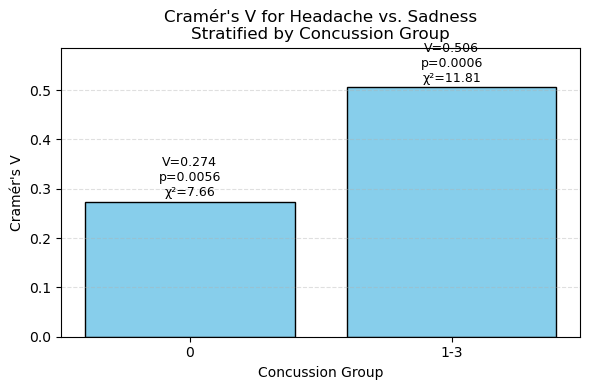

In [128]:
# Updated clean plot: Cramér's V with annotated p-values **and chi2 values** for publication clarity

import pandas as pd
import matplotlib.pyplot as plt

# Structured data
results_df = pd.DataFrame({
    'Concussion Group': ['0', '1-3'],
    'Chi2': [7.658, 11.811],
    'p-value': [0.0056, 0.0006],
    'Degrees of Freedom': [1, 1],
    "Cramér's V": [0.274, 0.506]
})

# Create bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(results_df['Concussion Group'],
               results_df["Cramér's V"],
               color='skyblue',
               edgecolor='black')

# Annotate bars with Cramér's V, p-value, and Chi2
for bar, cramers_v, p_val, chi2 in zip(bars,
                                       results_df["Cramér's V"],
                                       results_df['p-value'],
                                       results_df['Chi2']):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.005,
             f"V={cramers_v:.3f}\np={p_val:.4f}\nχ²={chi2:.2f}",
             ha='center', va='bottom', fontsize=9)

# Styling
plt.title("Cramér's V for Headache vs. Sadness\nStratified by Concussion Group")
plt.ylabel("Cramér's V")
plt.xlabel("Concussion Group")
plt.ylim(0, max(results_df["Cramér's V"]) + 0.08)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# Display plot for immediate download and slides
plt.show()

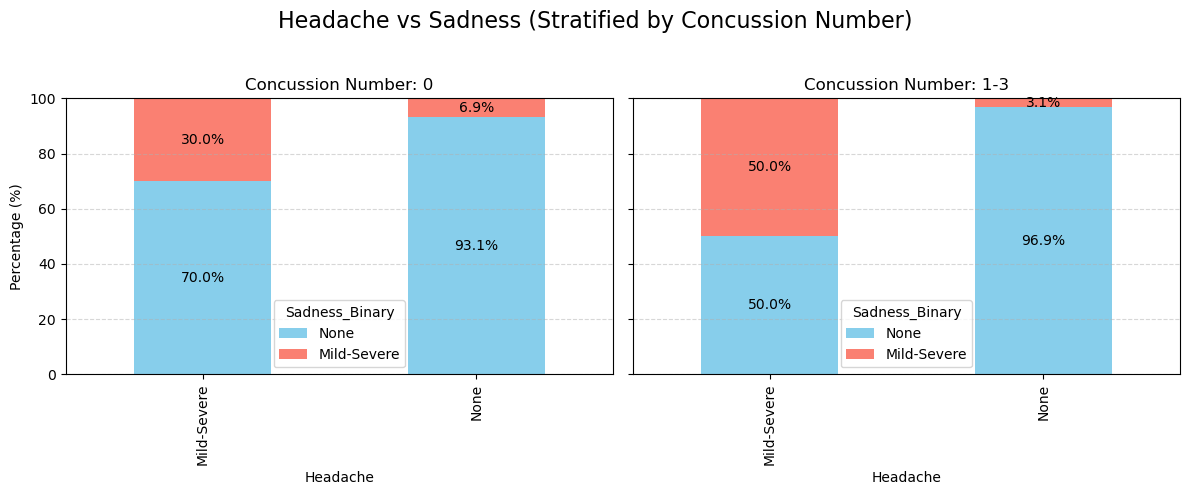

In [17]:
# Create clean stacked bar comparisons for headache vs sadness by concussion number
import matplotlib.pyplot as plt

# Create figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle('Headache vs Sadness (Stratified by Concussion Number)', fontsize=16)

# Loop over each concussion group for plotting
for ax, group in zip(axs, ['0', '1-3']):
    subset = df[df['Concussion Binary'] == group]
    contingency = pd.crosstab(subset['Headache_Binary'], subset['Sadness_Binary'], normalize='index') * 100
    contingency = contingency[['None', 'Mild-Severe']]  # consistent order

    # Plot
    contingency.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])
    ax.set_title(f'Concussion Number: {group}')
    ax.set_xlabel('Headache')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Add percentage labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [18]:
# Perform chi-square test of independence for:
# 1) Sex vs Dizziness
# 2) Sex vs Mentally Foggy

import pandas as pd
import scipy.stats as stats

# Create binary sex variable
df['Sex'] = df['Sex_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

# Create binary symptom variables
df['Dizziness_Binary'] = df['Dizziness'].apply(lambda x: 'None' if x == 0 else 'Mild-Severe')
df['MentallyFoggy_Binary'] = df['Mentally Foggy'].apply(lambda x: 'None' if x == 0 else 'Mild-Severe')

# Prepare tests
tests = [
    ('Sex', 'Dizziness_Binary'),
    ('Sex', 'MentallyFoggy_Binary')
]

results = []

for var1, var2 in tests:
    contingency = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    n = contingency.sum().sum()
    cramers_v = (chi2 / (n * (min(contingency.shape) - 1))) ** 0.5

    results.append({
        'Test': f'{var1} vs {var2}',
        'Chi2': chi2,
        'p-value': p,
        'Degrees of Freedom': dof,
        "Cramér's V": cramers_v,
        'Contingency Table': contingency
    })

# Display clean results for note-taking
results_df = pd.DataFrame([{
    'Test': r['Test'],
    'Chi2': r['Chi2'],
    'p-value': r['p-value'],
    'Degrees of Freedom': r['Degrees of Freedom'],
    "Cramér's V": r["Cramér's V"]
} for r in results])

results_df

,Test,Chi2,p-value,Degrees of Freedom,Cramér's V
0,Sex vs Dizziness_Binary,4.623119,0.031544,1,0.176741
1,Sex vs MentallyFoggy_Binary,1.400867,0.236578,1,0.097290


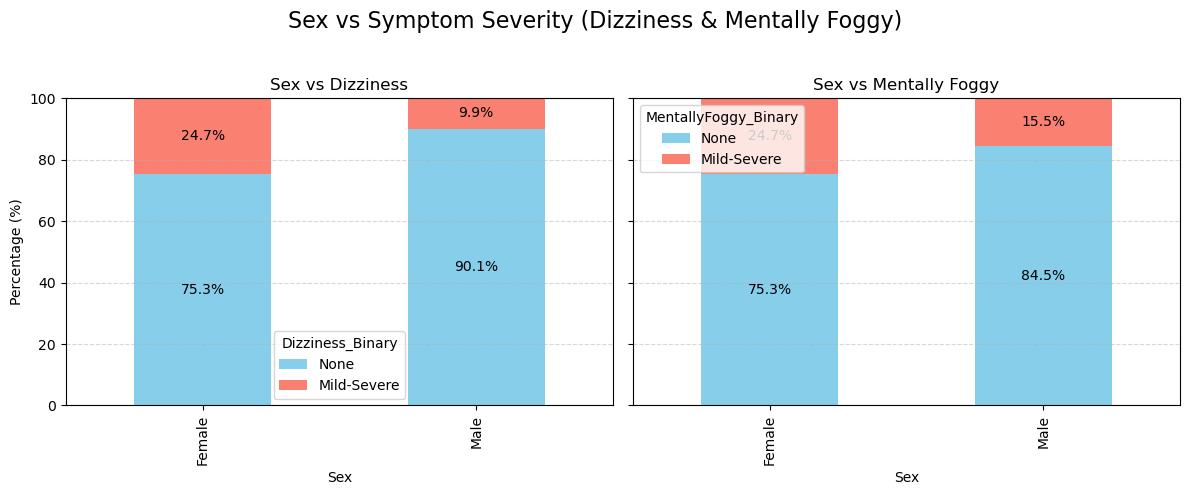

In [19]:
# Create clean stacked bar comparison for:
# 1) Sex vs Dizziness
# 2) Sex vs Mentally Foggy

import matplotlib.pyplot as plt

# Prepare figure
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle('Sex vs Symptom Severity (Dizziness & Mentally Foggy)', fontsize=16)

plot_settings = [
    ('Dizziness_Binary', axs[0], 'Dizziness'),
    ('MentallyFoggy_Binary', axs[1], 'Mentally Foggy')
]

for symptom_col, ax, title in plot_settings:
    crosstab = pd.crosstab(df['Sex'], df[symptom_col], normalize='index') * 100
    crosstab = crosstab[['None', 'Mild-Severe']]  # consistent order

    # Plot
    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])
    ax.set_title(f'Sex vs {title}')
    ax.set_xlabel('Sex')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Annotate bars with percentages
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [21]:
# Perform chi-square test of independence for Cheerleading vs Sadness

import pandas as pd
import scipy.stats as stats

# Create Cheerleading variable
df['Cheerleading'] = df['Sport_Cheerleading'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Create binary Sadness variable
df['Sadness_Binary'] = df['Sadness'].apply(lambda x: 'None' if x == 0 else 'Mild-Severe')

# Create contingency table
contingency = pd.crosstab(df['Cheerleading'], df['Sadness_Binary'])

# Perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency)
n = contingency.sum().sum()
cramers_v = (chi2 / (n * (min(contingency.shape) - 1))) ** 0.5

# Format results for clean interpretation
results_df = pd.DataFrame({
    'Chi2': [chi2],
    'p-value': [p],
    'Degrees of Freedom': [dof],
    "Cramér's V": [cramers_v]
})

results_df

,Chi2,p-value,Degrees of Freedom,Cramér's V
0,15.37035,0.000088,1,0.322263


<Figure size 600x500 with 0 Axes>

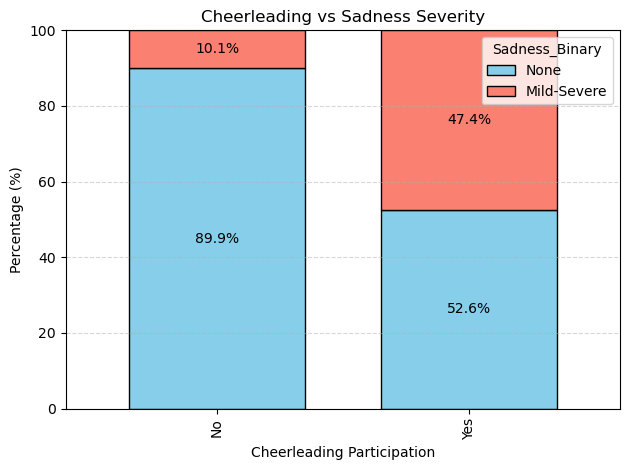

In [22]:
# Create clean stacked bar comparison visualization for Cheerleading vs Sadness

import matplotlib.pyplot as plt

# Prepare normalized contingency table
crosstab = pd.crosstab(df['Cheerleading'], df['Sadness_Binary'], normalize='index') * 100
crosstab = crosstab[['None', 'Mild-Severe']]  # consistent order

# Plot
plt.figure(figsize=(6, 5))
bars = crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='black', width=0.7)

plt.title('Cheerleading vs Sadness Severity')
plt.xlabel('Cheerleading Participation')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars with percentages
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

In [23]:
# Perform chi-square tests of independence for Depression Diagnosis (Yes/No) vs all symptom variables
import pandas as pd
import scipy.stats as stats

# Create binary depression diagnosis variable
df['Depression Diagnosis'] = df['Depression Diagnosis_Yes'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Create binary symptom variables
df['Headache_Binary'] = df['Headache'].apply(lambda x: 'None' if x == 0 else 'Mild-Severe')
df['Dizziness_Binary'] = df['Dizziness'].apply(lambda x: 'None' if x == 0 else 'Mild-Severe')
df['MentallyFoggy_Binary'] = df['Mentally Foggy'].apply(lambda x: 'None' if x == 0 else 'Mild-Severe')
df['Sadness_Binary'] = df['Sadness'].apply(lambda x: 'None' if x == 0 else 'Mild-Severe')

# Define tests
symptom_tests = ['Headache_Binary', 'Dizziness_Binary', 'MentallyFoggy_Binary', 'Sadness_Binary']
results = []

for symptom in symptom_tests:
    contingency = pd.crosstab(df['Depression Diagnosis'], df[symptom])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    n = contingency.sum().sum()
    cramers_v = (chi2 / (n * (min(contingency.shape) - 1))) ** 0.5

    results.append({
        'Test': f'Depression Diagnosis vs {symptom.replace("_Binary","")}',
        'Chi2': chi2,
        'p-value': p,
        'Degrees of Freedom': dof,
        "Cramér's V": cramers_v
    })

# Create and display clean results for direct interpretation
results_df = pd.DataFrame(results)

results_df

,Test,Chi2,p-value,Degrees of Freedom,Cramér's V
0,Depression Diagnosis vs Headache,1.884716,0.169799,1,0.112848
1,Depression Diagnosis vs Dizziness,6.960472,0.008333,1,0.216865
2,Depression Diagnosis vs MentallyFoggy,0.334196,0.563199,1,0.047519
3,Depression Diagnosis vs Sadness,4.370299,0.036571,1,0.171840


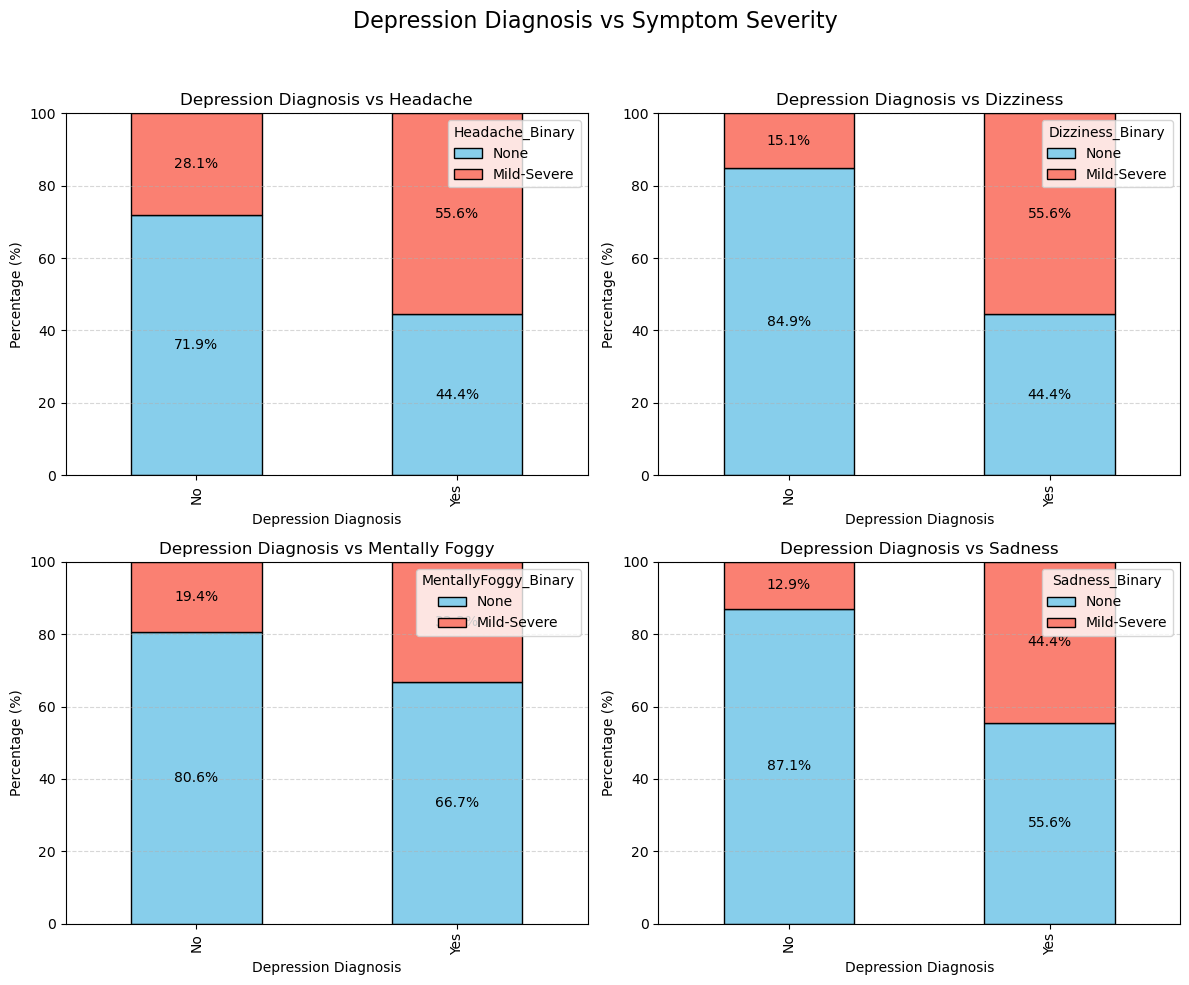

In [24]:
# Create clean stacked bar visualizations for Depression Diagnosis vs Symptoms
import matplotlib.pyplot as plt

# Symptoms to visualize
symptoms_to_plot = [
    ('Headache_Binary', 'Headache'),
    ('Dizziness_Binary', 'Dizziness'),
    ('MentallyFoggy_Binary', 'Mentally Foggy'),
    ('Sadness_Binary', 'Sadness')
]

# Prepare figure
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Depression Diagnosis vs Symptom Severity', fontsize=16)

# Plot for each symptom
for ax, (symptom_col, symptom_label) in zip(axs.flat, symptoms_to_plot):
    crosstab = pd.crosstab(df['Depression Diagnosis'], df[symptom_col], normalize='index') * 100
    crosstab = crosstab[['None', 'Mild-Severe']]  # consistent order

    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'], edgecolor='black')

    ax.set_title(f'Depression Diagnosis vs {symptom_label}')
    ax.set_xlabel('Depression Diagnosis')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle='--', alpha=0.5)

    # Annotate percentages on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center', color='black', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


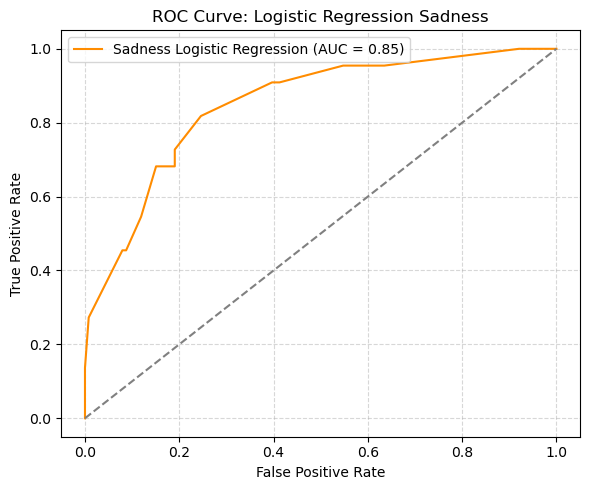

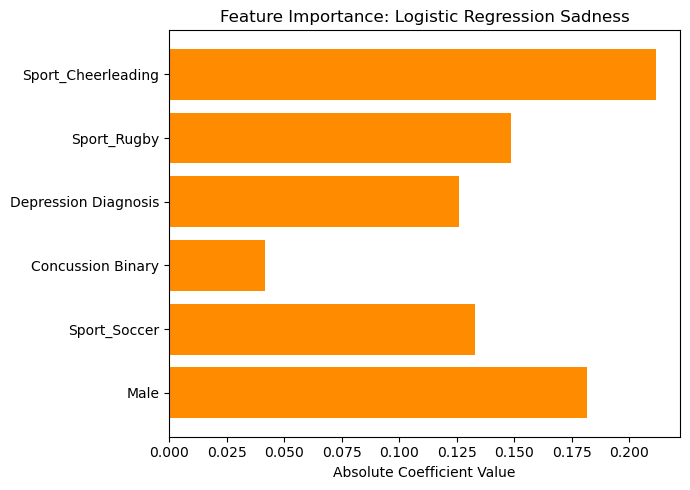

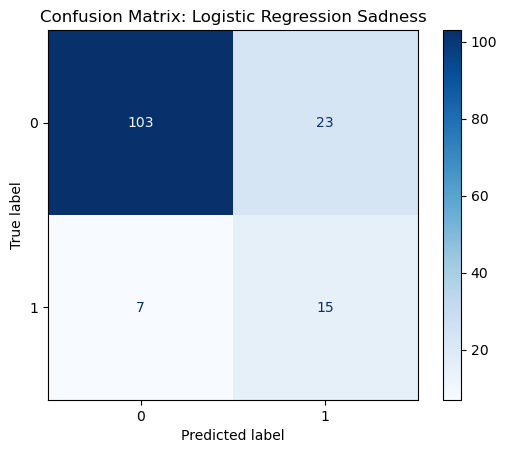

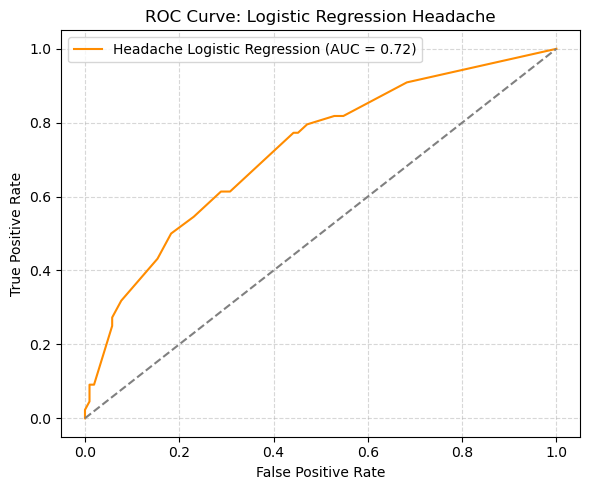

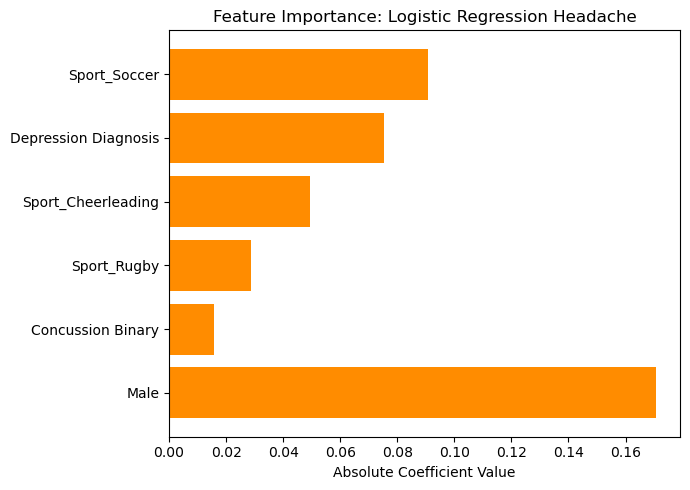

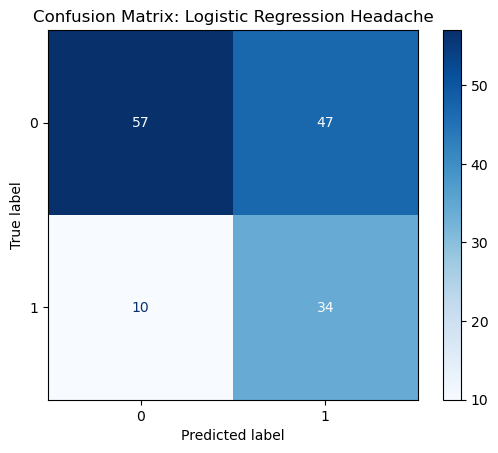

In [124]:
# Build logistic regression models for Sadness and Headache with hyperparameter tuning, cross-validation, ROC visualization, and feature importance

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np


# Function for structured workflow
def logistic_regression_analysis(X, y, symptom_label):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=500, class_weight='balanced', random_state=42))
    ])

    param_grid = {
        'logreg__C': [0.01, 0.1, 1, 10],
        'logreg__penalty': ['l2'],
        'logreg__solver': ['lbfgs']
    }

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=1,
        verbose=0
    )

    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    y_pred = best_model.predict(X)
    y_proba = best_model.predict_proba(X)[:, 1]

    roc_auc = roc_auc_score(y, y_proba)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{symptom_label} Logistic Regression (AUC = {roc_auc:.2f})', color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: Logistic Regression {symptom_label}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Feature Importance
    coefs = best_model.named_steps['logreg'].coef_[0]
    feature_importance_df = pd.DataFrame({
        'Feature': predictors,
        'Coefficient': coefs,
        'Odds Ratio': np.exp(coefs)
    }).sort_values(by='Odds Ratio', ascending=False)

    plt.figure(figsize=(7, 5))
    plt.barh(feature_importance_df['Feature'], np.abs(feature_importance_df['Coefficient']), color='darkorange')
    plt.xlabel('Absolute Coefficient Value')
    plt.title(f'Feature Importance: Logistic Regression {symptom_label}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

      # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: Logistic Regression {symptom_label}')
    plt.show()
    
    # Summary table
    summary_df = pd.DataFrame({
        'Metric': ['ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [roc_auc, accuracy, precision, recall, f1]
    })
    
# Run for Sadness
logistic_regression_analysis(X, y_sadness, "Sadness")

# Run for Headache
logistic_regression_analysis(X, y_headache, "Headache")

In [87]:
# ROC AUC, Accuracy, Precision, Recall, F1 for logistic regression on Sadness and Headache

# Function for structured metric calculation without plots
def logistic_metrics(X, y, symptom_label):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=500, class_weight='balanced', C=0.01, penalty='l2', solver='lbfgs', random_state=42))
    ])
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    y_proba = pipeline.predict_proba(X)[:, 1]

    roc_auc = round(roc_auc_score(y, y_proba), 3)
    accuracy = round(accuracy_score(y, y_pred), 3)
    precision = round(precision_score(y, y_pred), 3)
    recall = round(recall_score(y, y_pred), 3)
    f1 = round(f1_score(y, y_pred), 3)

    return {
        "Symptom": symptom_label,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Calculate for Sadness and Headache
sadness_metrics = logistic_metrics(X, y_sadness, "Sadness")
headache_metrics = logistic_metrics(X, y_headache, "Headache")

# Create and display clean final comparison table
final_logreg_metrics_df = pd.DataFrame([sadness_metrics, headache_metrics])

final_logreg_metrics_df


,Symptom,ROC AUC,Accuracy,Precision,Recall,F1 Score
0,Sadness,0.849,0.797,0.395,0.682,0.500
1,Headache,0.723,0.615,0.420,0.773,0.544


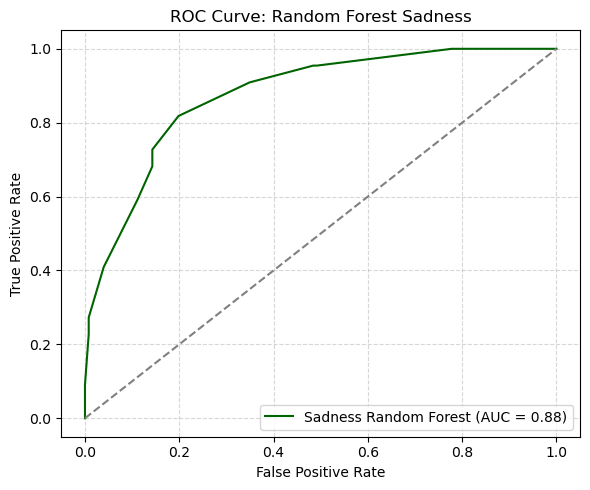

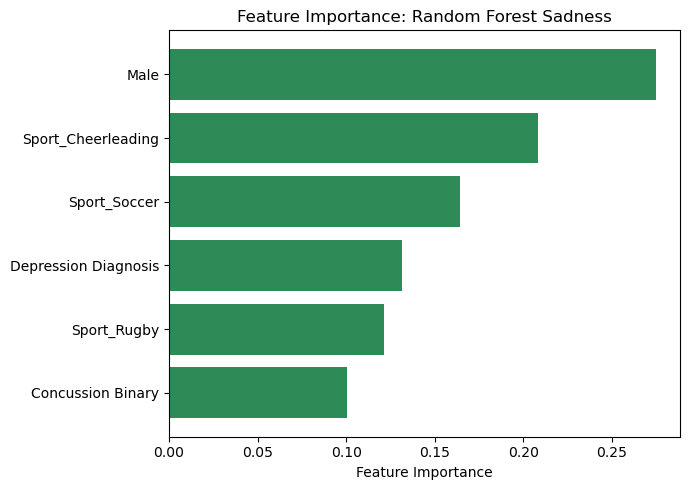

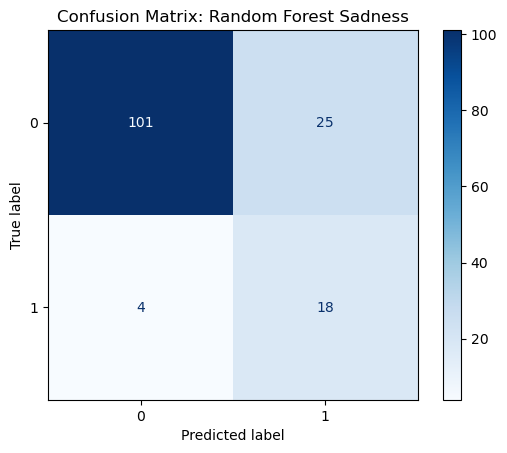

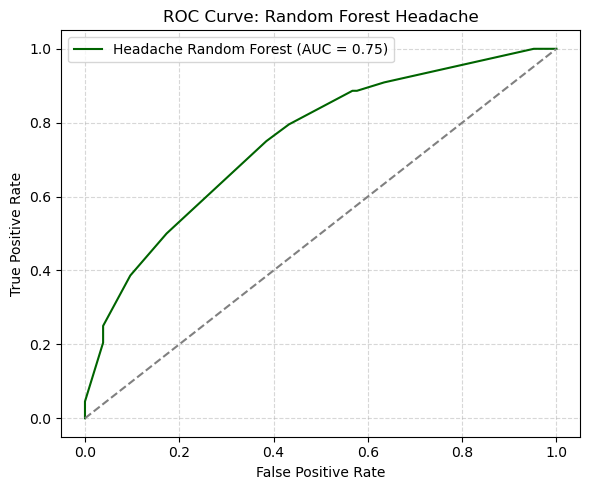

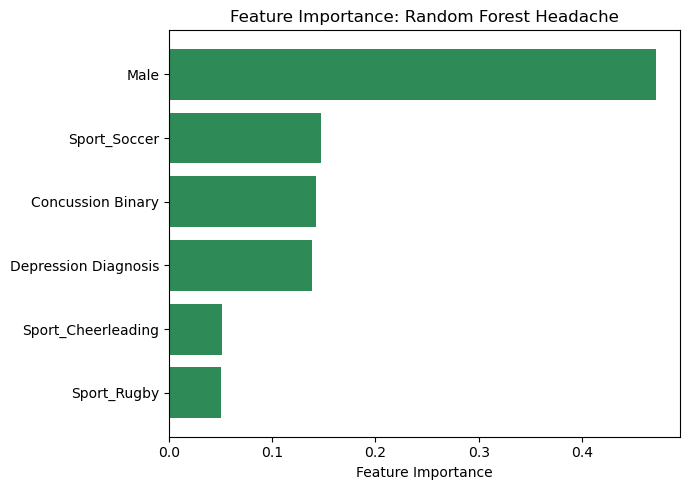

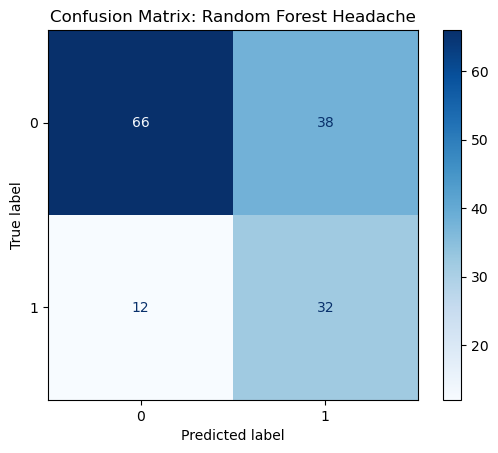

In [117]:
# Random Forest for Sadness and Headache with cross-validation and hyperparameter tuning efficiently

# Import stable required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Prepare predictors and targets
df['Sadness_Binary'] = df['Sadness'].apply(lambda x: 0 if x == 0 else 1)
df['Headache_Binary'] = df['Headache'].apply(lambda x: 0 if x == 0 else 1)
df['Concussion Binary'] = df['Concussion Number'].round(5).apply(lambda x: 0 if x == 0 else 1)
df['Male'] = df['Sex_Male']
df['Depression Diagnosis'] = df['Depression Diagnosis_Yes']
sports = ['Sport_Cheerleading', 'Sport_Rugby', 'Sport_Soccer']
predictors = ['Concussion Binary', 'Male', 'Depression Diagnosis'] + sports

X = df[predictors]
y_sadness = df['Sadness_Binary']
y_headache = df['Headache_Binary']

# Memory-efficient Random Forest analysis
def random_forest_analysis(X, y, symptom_label):
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    param_grid = {
        'n_estimators': [100],
        'max_depth': [5, None]
    }

    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=1,
        verbose=0
    )

    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    y_pred = best_model.predict(X)
    y_proba = best_model.predict_proba(X)[:, 1]

    roc_auc = round(roc_auc_score(y, y_proba), 3)
    accuracy = round(accuracy_score(y, y_pred), 3)
    precision = round(precision_score(y, y_pred), 3)
    recall = round(recall_score(y, y_pred), 3)
    f1 = round(f1_score(y, y_pred), 3)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{symptom_label} Random Forest (AUC = {roc_auc:.2f})', color='darkgreen')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: Random Forest {symptom_label}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Feature Importance
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': predictors,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(7, 5))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='seagreen')
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance: Random Forest {symptom_label}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

     # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: Random Forest {symptom_label}')
    plt.show()
    
    # Structured results
    summary_df = pd.DataFrame({
        'Metric': ['ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [roc_auc, accuracy, precision, recall, f1]
    })

# Execute for Sadness
random_forest_analysis(X, y_sadness, "Sadness")

# Execute for Headache
random_forest_analysis(X, y_headache, "Headache")


In [90]:
# ROC AUC, Accuracy, Precision, Recall, F1 for Random Forest on Sadness and Headache

# Function to calculate and return structured metrics for clarity
def random_forest_metrics(X, y, symptom_label):
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        class_weight='balanced',
        random_state=42
    )
    rf.fit(X, y)
    y_pred = rf.predict(X)
    y_proba = rf.predict_proba(X)[:, 1]

    roc_auc = round(roc_auc_score(y, y_proba), 3)
    accuracy = round(accuracy_score(y, y_pred), 3)
    precision = round(precision_score(y, y_pred), 3)
    recall = round(recall_score(y, y_pred), 3)
    f1 = round(f1_score(y, y_pred), 3)

    return {
        "Symptom": symptom_label,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Calculate for Sadness and Headache
rf_sadness_metrics = random_forest_metrics(X, y_sadness, "Sadness")
rf_headache_metrics = random_forest_metrics(X, y_headache, "Headache")

# Create clean comparison table
rf_metrics_df = pd.DataFrame([rf_sadness_metrics, rf_headache_metrics])

rf_metrics_df


,Symptom,ROC AUC,Accuracy,Precision,Recall,F1 Score
0,Sadness,0.876,0.804,0.419,0.818,0.554
1,Headache,0.751,0.662,0.457,0.727,0.561


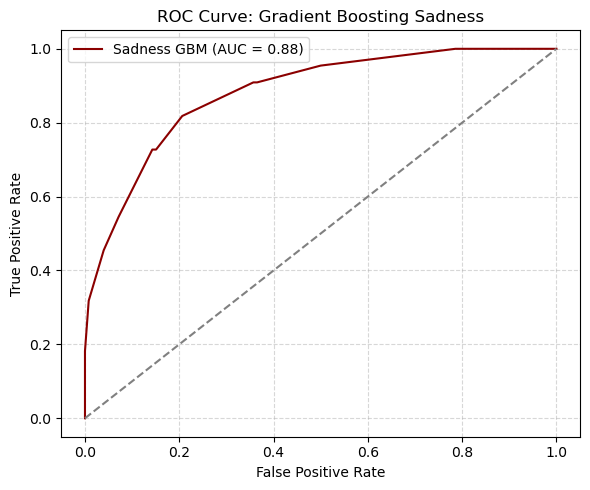

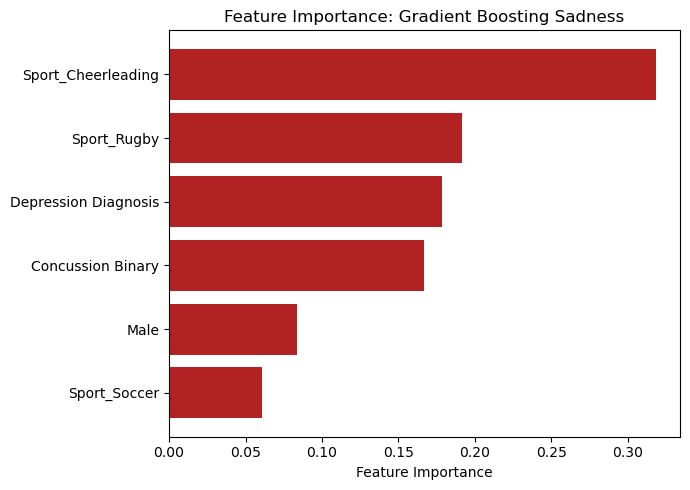

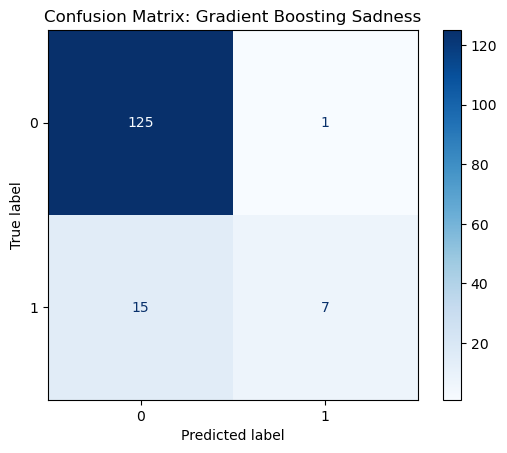

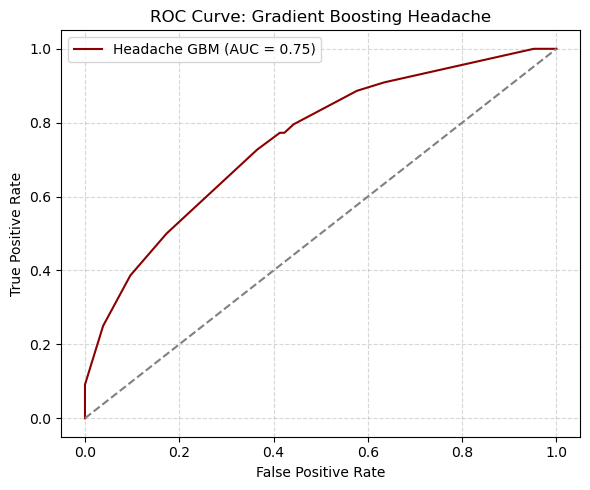

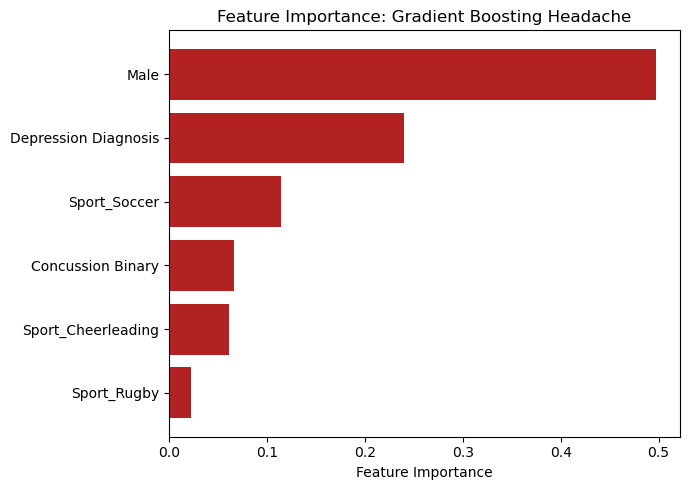

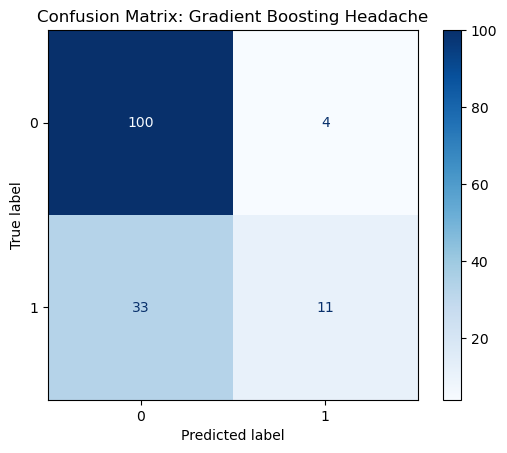

In [118]:
# Gradient Boosting models for Sadness and Headache with cross-validation, hyperparameter tuning, ROC AUC, and feature importance

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np


# Stable structured GBM workflow
def gradient_boosting_analysis(X, y, symptom_label):
    gbm = GradientBoostingClassifier(random_state=42)

    param_grid = {
        'n_estimators': [100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    }

    grid_search = GridSearchCV(
        estimator=gbm,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=1,
        verbose=0
    )

    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    y_pred = best_model.predict(X)
    y_proba = best_model.predict_proba(X)[:, 1]

    roc_auc = round(roc_auc_score(y, y_proba), 3)
    accuracy = round(accuracy_score(y, y_pred), 3)
    precision = round(precision_score(y, y_pred), 3)
    recall = round(recall_score(y, y_pred), 3)
    f1 = round(f1_score(y, y_pred), 3)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{symptom_label} GBM (AUC = {roc_auc:.2f})', color='darkred')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: Gradient Boosting {symptom_label}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Feature Importance
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': predictors,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(7, 5))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='firebrick')
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance: Gradient Boosting {symptom_label}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

      # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: Gradient Boosting {symptom_label}')
    plt.show()
    
    # Structured results
    summary_df = pd.DataFrame({
        'Metric': ['ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [roc_auc, accuracy, precision, recall, f1]
    })

# Run GBM for Sadness
gradient_boosting_analysis(X, y_sadness, "Sadness")

# Run GBM for Headache
gradient_boosting_analysis(X, y_headache, "Headache")


In [92]:
# ROC AUC, Accuracy, Precision, Recall, F1 Score for Gradient Boosting on Sadness and Headache systematically

# Function for consistent metric capture
def gbm_metrics(X, y, symptom_label):
    gbm = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )
    gbm.fit(X, y)
    y_pred = gbm.predict(X)
    y_proba = gbm.predict_proba(X)[:, 1]

    roc_auc = round(roc_auc_score(y, y_proba), 3)
    accuracy = round(accuracy_score(y, y_pred), 3)
    precision = round(precision_score(y, y_pred), 3)
    recall = round(recall_score(y, y_pred), 3)
    f1 = round(f1_score(y, y_pred), 3)

    return {
        "Symptom": symptom_label,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Calculate for Sadness and Headache
gbm_sadness_metrics = gbm_metrics(X, y_sadness, "Sadness")
gbm_headache_metrics = gbm_metrics(X, y_headache, "Headache")

# Create and display structured table
gbm_metrics_df = pd.DataFrame([gbm_sadness_metrics, gbm_headache_metrics])

gbm_metrics_df


,Symptom,ROC AUC,Accuracy,Precision,Recall,F1 Score
0,Sadness,0.881,0.892,0.875,0.318,0.467
1,Headache,0.752,0.750,0.733,0.250,0.373


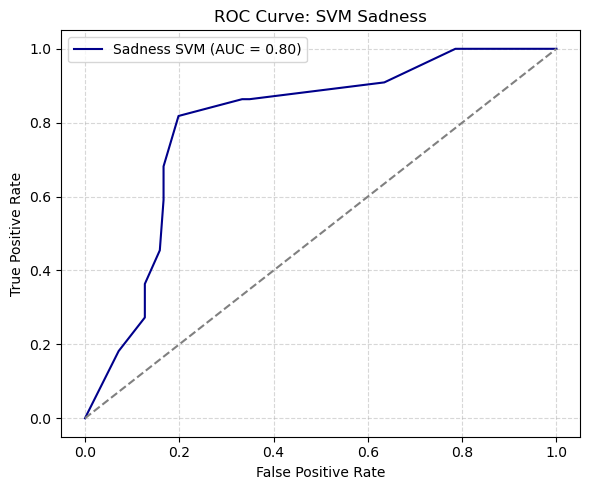

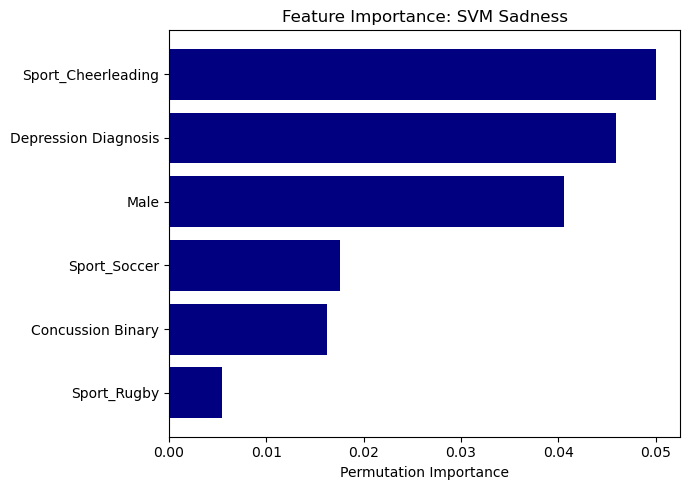

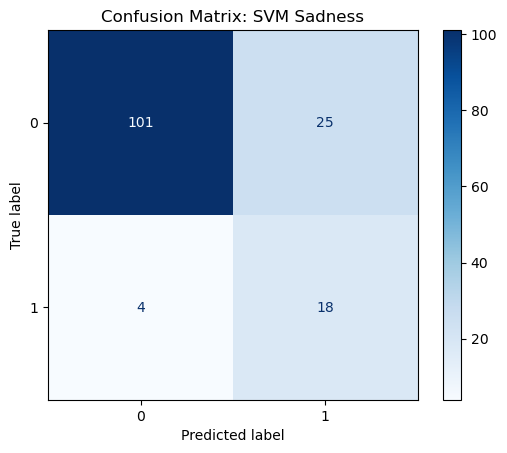

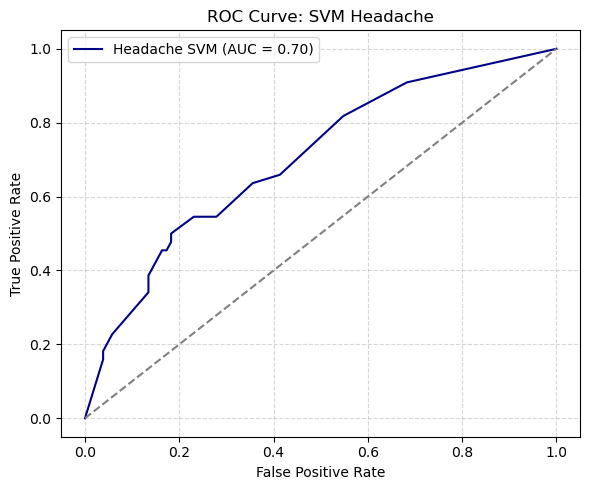

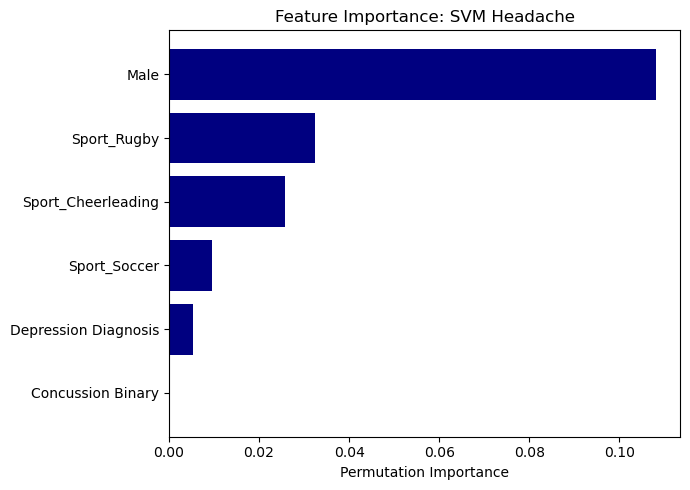

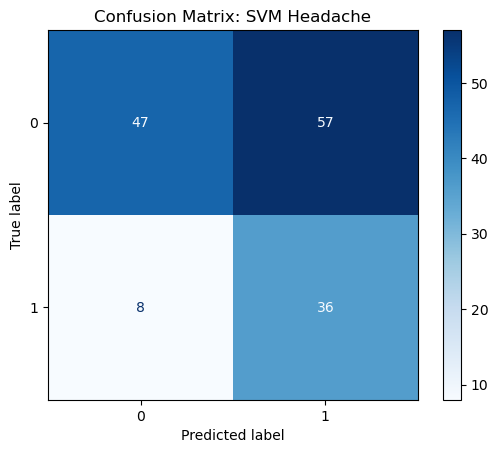

In [119]:
# SVM models for Sadness and Headache with cross-validation, hyperparameter tuning, ROC AUC, and permutation-based feature importance

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np


# Stable structured SVM workflow
def svm_analysis(X, y, symptom_label):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(probability=True, class_weight='balanced', random_state=42))
    ])

    param_grid = {
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['linear', 'rbf'],
        'svc__gamma': ['scale']
    }

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=1,
        verbose=0
    )

    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    y_pred = best_model.predict(X)
    y_proba = best_model.predict_proba(X)[:, 1]

    roc_auc = round(roc_auc_score(y, y_proba), 3)
    accuracy = round(accuracy_score(y, y_pred), 3)
    precision = round(precision_score(y, y_pred), 3)
    recall = round(recall_score(y, y_pred), 3)
    f1 = round(f1_score(y, y_pred), 3)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{symptom_label} SVM (AUC = {roc_auc:.2f})', color='darkblue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: SVM {symptom_label}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Permutation Feature Importance
    perm_importance = permutation_importance(best_model, X, y, n_repeats=5, random_state=42, n_jobs=1)
    importances = perm_importance.importances_mean

    feature_importance_df = pd.DataFrame({
        'Feature': predictors,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(7, 5))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='navy')
    plt.xlabel('Permutation Importance')
    plt.title(f'Feature Importance: SVM {symptom_label}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

      # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: SVM {symptom_label}')
    plt.show()
    
    # Structured results
    summary_df = pd.DataFrame({
        'Metric': ['ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [roc_auc, accuracy, precision, recall, f1]
    })

# Run SVM for Sadness
svm_analysis(X, y_sadness, "Sadness")

# Run SVM for Headache
svm_analysis(X, y_headache, "Headache")

In [94]:
# ROC AUC, Accuracy, Precision, Recall, F1 Score for SVM on Sadness and Headache systematically

# Consistent pipeline with best parameters found
def svm_metrics(X, y, symptom_label, C_value):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(probability=True, class_weight='balanced', kernel='rbf', C=C_value, gamma='scale', random_state=42))
    ])
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    y_proba = pipeline.predict_proba(X)[:, 1]

    roc_auc = round(roc_auc_score(y, y_proba), 3)
    accuracy = round(accuracy_score(y, y_pred), 3)
    precision = round(precision_score(y, y_pred), 3)
    recall = round(recall_score(y, y_pred), 3)
    f1 = round(f1_score(y, y_pred), 3)

    return {
        "Symptom": symptom_label,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Using the best tuned C values found previously:
# Sadness: C=10
# Headache: C=0.1

svm_sadness_metrics = svm_metrics(X, y_sadness, "Sadness", C_value=10)
svm_headache_metrics = svm_metrics(X, y_headache, "Headache", C_value=0.1)

# Compile results into a clean structured DataFrame
svm_metrics_df = pd.DataFrame([svm_sadness_metrics, svm_headache_metrics])

svm_metrics_df

,Symptom,ROC AUC,Accuracy,Precision,Recall,F1 Score
0,Sadness,0.799,0.804,0.419,0.818,0.554
1,Headache,0.703,0.561,0.387,0.818,0.526


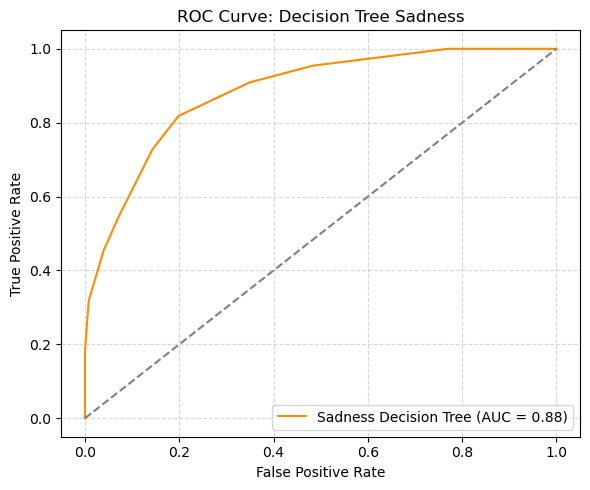

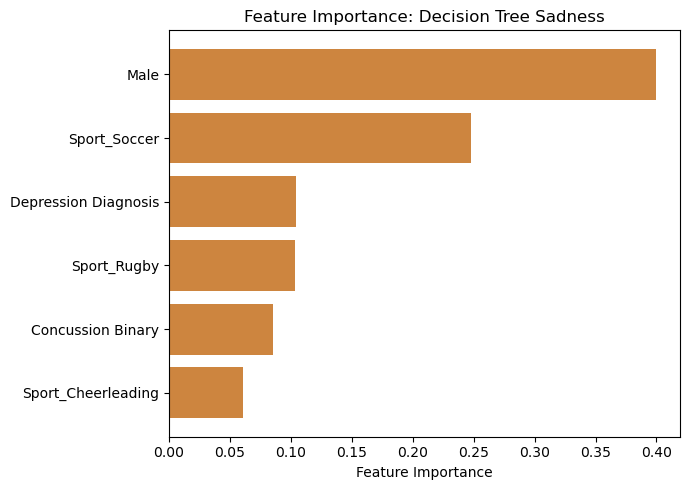

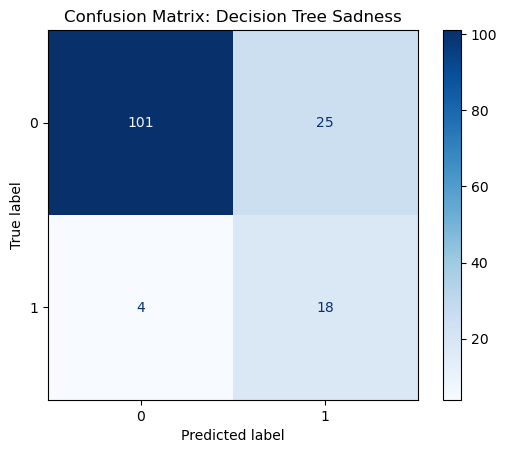

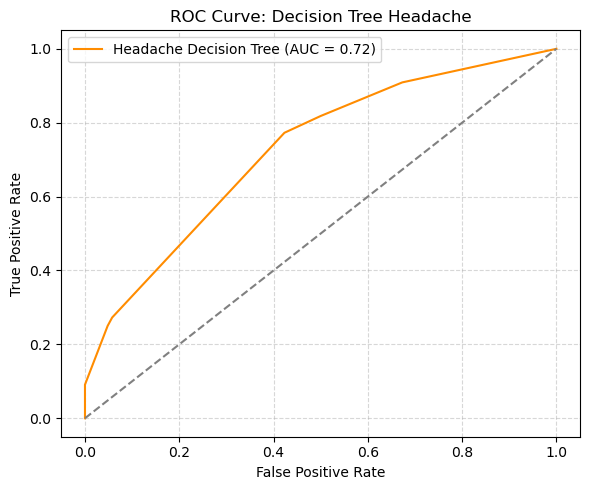

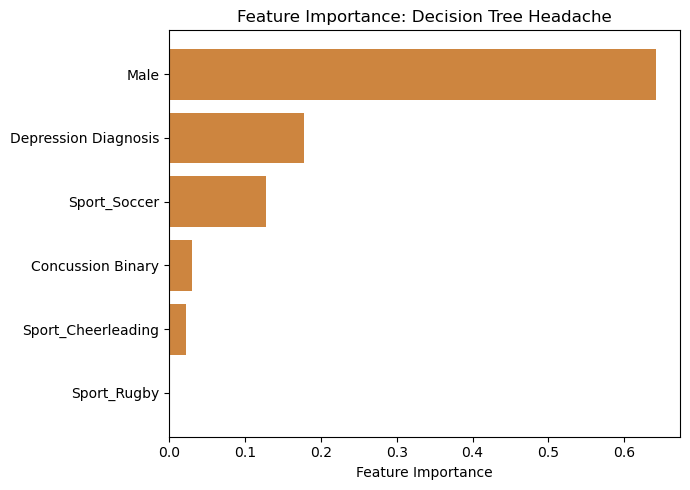

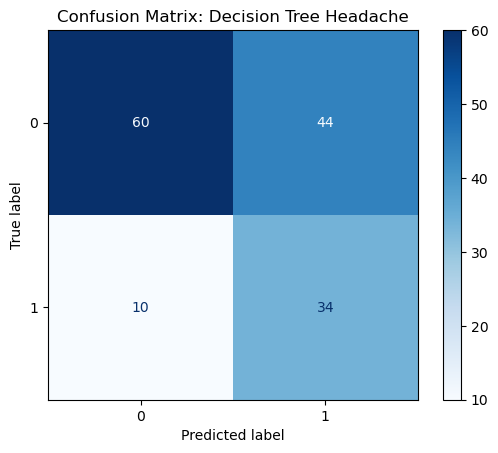

In [120]:
# Decision Tree models for Sadness and Headache with cross-validation, hyperparameter tuning, ROC AUC, and feature importance

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np


# Stable structured DT workflow
def decision_tree_analysis(X, y, symptom_label):
    dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

    param_grid = {
        'max_depth': [3, 5, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=1,
        verbose=0
    )

    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    y_pred = best_model.predict(X)
    y_proba = best_model.predict_proba(X)[:, 1]

    roc_auc = round(roc_auc_score(y, y_proba), 3)
    accuracy = round(accuracy_score(y, y_pred), 3)
    precision = round(precision_score(y, y_pred), 3)
    recall = round(recall_score(y, y_pred), 3)
    f1 = round(f1_score(y, y_pred), 3)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{symptom_label} Decision Tree (AUC = {roc_auc:.2f})', color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: Decision Tree {symptom_label}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Feature Importance
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': predictors,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(7, 5))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='peru')
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance: Decision Tree {symptom_label}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

     # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: Decision Tree {symptom_label}')
    plt.show()
    
    # Structured results
    summary_df = pd.DataFrame({
        'Metric': ['ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [roc_auc, accuracy, precision, recall, f1]
    })

# Run Decision Tree for Sadness
decision_tree_analysis(X, y_sadness, "Sadness")

# Run Decision Tree for Headache
decision_tree_analysis(X, y_headache, "Headache")

In [96]:
# ROC AUC, Accuracy, Precision, Recall, F1 Score for Decision Tree on Sadness and Headache systematically

# Function to compute and return clean metrics
def decision_tree_metrics(X, y, symptom_label, max_depth_value):
    dt = DecisionTreeClassifier(
        max_depth=max_depth_value,
        min_samples_leaf=1,
        min_samples_split=2,
        class_weight='balanced',
        random_state=42
    )
    dt.fit(X, y)
    y_pred = dt.predict(X)
    y_proba = dt.predict_proba(X)[:, 1]

    roc_auc = round(roc_auc_score(y, y_proba), 3)
    accuracy = round(accuracy_score(y, y_pred), 3)
    precision = round(precision_score(y, y_pred), 3)
    recall = round(recall_score(y, y_pred), 3)
    f1 = round(f1_score(y, y_pred), 3)

    return {
        "Symptom": symptom_label,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Using best tuned max_depth values found:
# Sadness: max_depth=None
# Headache: max_depth=3

dt_sadness_metrics = decision_tree_metrics(X, y_sadness, "Sadness", max_depth_value=None)
dt_headache_metrics = decision_tree_metrics(X, y_headache, "Headache", max_depth_value=3)

# Compile and display structured results
dt_metrics_df = pd.DataFrame([dt_sadness_metrics, dt_headache_metrics])

dt_metrics_df


,Symptom,ROC AUC,Accuracy,Precision,Recall,F1 Score
0,Sadness,0.884,0.804,0.419,0.818,0.554
1,Headache,0.724,0.635,0.436,0.773,0.557



==== Naive Bayes for Sadness ====
ROC AUC: 0.853
Accuracy: 0.311
Precision: 0.177
Recall: 1.000
F1 Score: 0.301


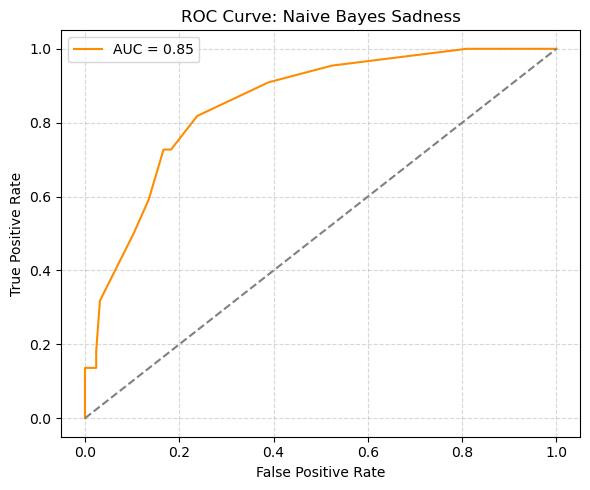


Feature Importances:
                Feature  Importance
5          Sport_Soccer    0.054054
0     Concussion Binary    0.000000
1                  Male    0.000000
2  Depression Diagnosis    0.000000
3    Sport_Cheerleading    0.000000
4           Sport_Rugby    0.000000


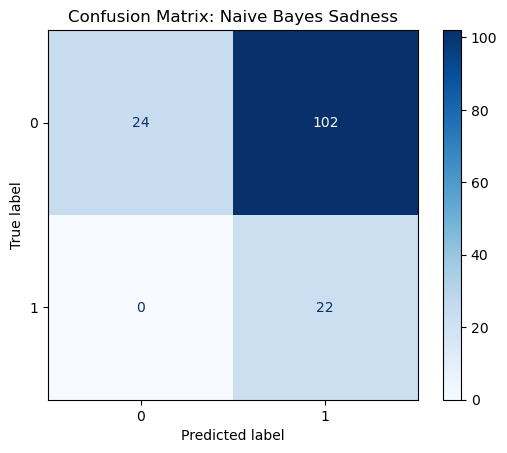

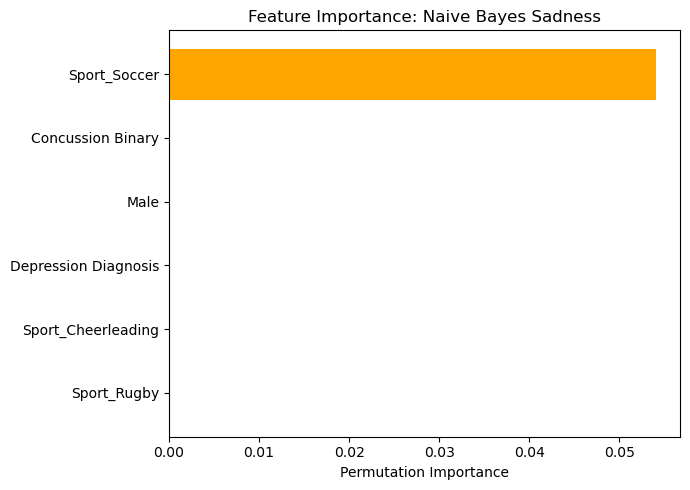


==== Naive Bayes for Headache ====
ROC AUC: 0.700
Accuracy: 0.703
Precision: 0.500
Recall: 0.500
F1 Score: 0.500


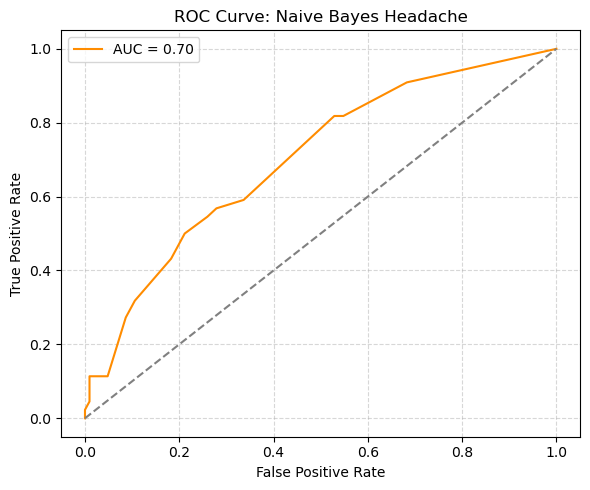


Feature Importances:
                Feature  Importance
1                  Male    0.033784
2  Depression Diagnosis    0.029730
5          Sport_Soccer    0.022973
3    Sport_Cheerleading    0.014865
0     Concussion Binary    0.010811
4           Sport_Rugby    0.004054


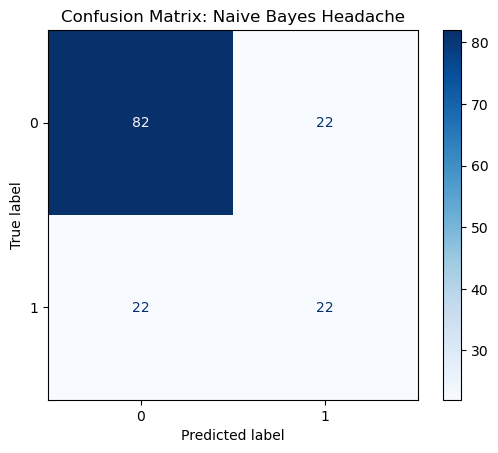

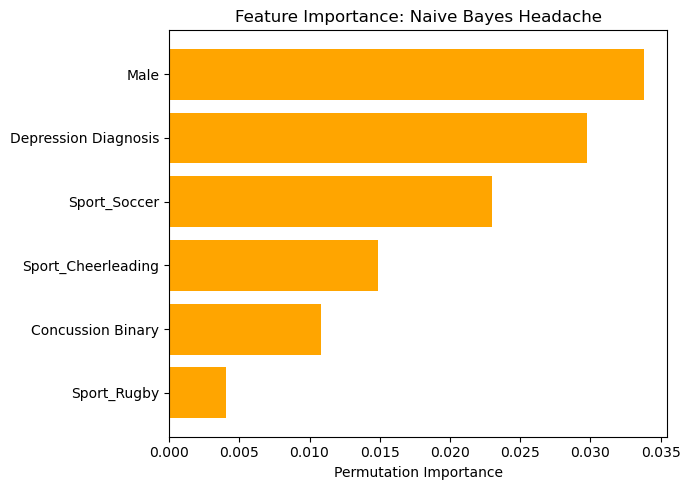

In [121]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np


# Preprocessing
df['Sadness_Binary'] = df['Sadness'].apply(lambda x: 0 if x == 0 else 1)
df['Headache_Binary'] = df['Headache'].apply(lambda x: 0 if x == 0 else 1)
df['Concussion Binary'] = df['Concussion Number'].round(5).apply(lambda x: 0 if x == 0 else 1)
df['Male'] = df['Sex_Male']
df['Depression Diagnosis'] = df['Depression Diagnosis_Yes']
sports = ['Sport_Cheerleading', 'Sport_Rugby', 'Sport_Soccer']
predictors = ['Concussion Binary', 'Male', 'Depression Diagnosis'] + sports

X = df[predictors]
y_sadness = df['Sadness_Binary']
y_headache = df['Headache_Binary']

def nb_with_importance(X, y, symptom_label):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('nb', GaussianNB())
    ])
    
    # Fit model
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    y_proba = pipeline.predict_proba(X)[:, 1]
    
    # Metrics
    roc_auc = roc_auc_score(y, y_proba)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    print(f"\n==== Naive Bayes for {symptom_label} ====")
    print(f"ROC AUC: {roc_auc:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: Naive Bayes {symptom_label}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Permutation Importance
    result = permutation_importance(pipeline, X, y, n_repeats=5, random_state=42, n_jobs=-1)
    importance_df = pd.DataFrame({
        'Feature': predictors,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)
    
    print("\nFeature Importances:")
    print(importance_df)

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: Naive Bayes {symptom_label}')
    plt.show()
    
    # Bar plot
    plt.figure(figsize=(7,5))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
    plt.xlabel('Permutation Importance')
    plt.title(f'Feature Importance: Naive Bayes {symptom_label}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Run for Sadness
nb_with_importance(X, y_sadness, "Sadness")

# Run for Headache
nb_with_importance(X, y_headache, "Headache")

Fitting 5 folds for each of 6 candidates, totalling 30 fits

==== KNN Results for Sadness ====
Best Params: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Best CV ROC AUC: 0.795
ROC AUC: 0.868
Accuracy: 0.892
Precision: 0.875
Recall: 0.318
F1 Score: 0.467


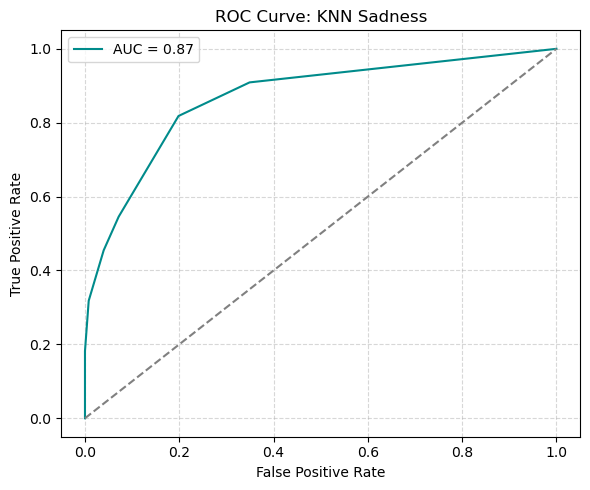

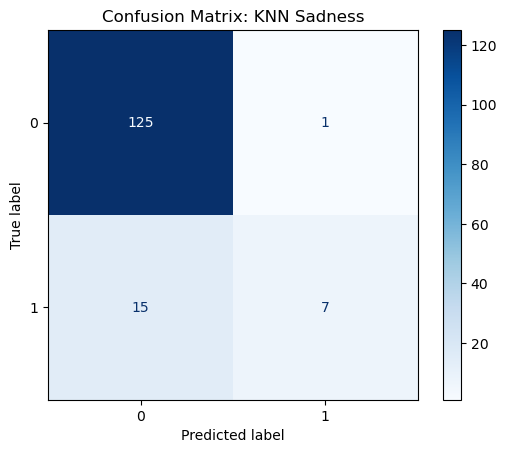


Feature Importances:
                Feature  Importance
3    Sport_Cheerleading    0.049550
2  Depression Diagnosis    0.047297
0     Concussion Binary    0.040541
4           Sport_Rugby    0.013514
1                  Male    0.011261
5          Sport_Soccer    0.011261


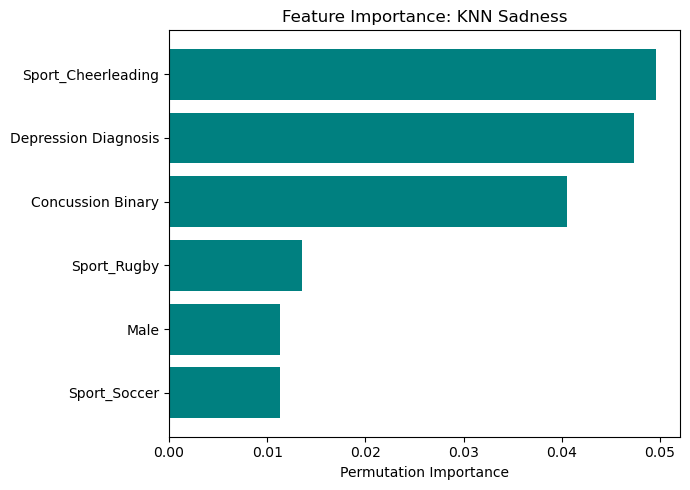

Fitting 5 folds for each of 6 candidates, totalling 30 fits

==== KNN Results for Headache ====
Best Params: {'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Best CV ROC AUC: 0.618
ROC AUC: 0.684
Accuracy: 0.709
Precision: 0.529
Recall: 0.205
F1 Score: 0.295


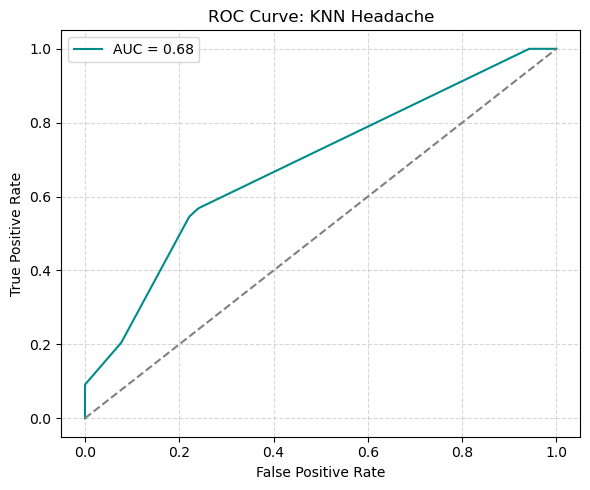

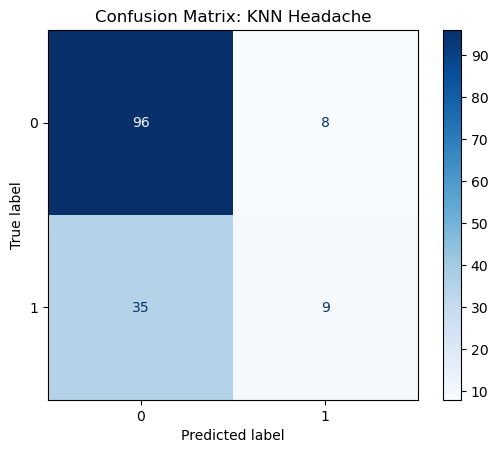


Feature Importances:
                Feature  Importance
2  Depression Diagnosis    0.029279
3    Sport_Cheerleading    0.013514
5          Sport_Soccer    0.011261
1                  Male    0.004505
0     Concussion Binary    0.002252
4           Sport_Rugby    0.002252


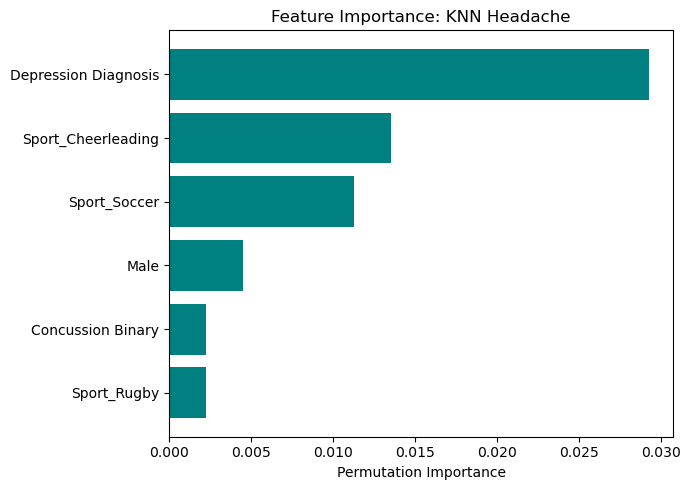

[CV] END ...........knn__n_neighbors=3, knn__weights=uniform; total time=   0.1s
[CV] END ...........knn__n_neighbors=5, knn__weights=uniform; total time=   0.0s
[CV] END ..........knn__n_neighbors=5, knn__weights=distance; total time=   0.0s
[CV] END ..........knn__n_neighbors=7, knn__weights=distance; total time=   0.0s
[CV] END ..........knn__n_neighbors=3, knn__weights=distance; total time=   0.0s
[CV] END ..........knn__n_neighbors=5, knn__weights=distance; total time=   0.0s
[CV] END ..........knn__n_neighbors=7, knn__weights=distance; total time=   0.0s
[CV] END ..........knn__n_neighbors=3, knn__weights=distance; total time=   0.0s
[CV] END ...........knn__n_neighbors=5, knn__weights=uniform; total time=   0.0s
[CV] END ..........knn__n_neighbors=5, knn__weights=distance; total time=   0.0s
[CV] END ...........knn__n_neighbors=7, knn__weights=uniform; total time=   0.0s
[CV] END ...........knn__n_neighbors=3, knn__weights=uniform; total time=   0.1s
[CV] END ..........knn__n_ne

In [122]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Preprocessing
df['Sadness_Binary'] = df['Sadness'].apply(lambda x: 0 if x == 0 else 1)
df['Headache_Binary'] = df['Headache'].apply(lambda x: 0 if x == 0 else 1)
df['Concussion Binary'] = df['Concussion Number'].round(5).apply(lambda x: 0 if x == 0 else 1)
df['Male'] = df['Sex_Male']
df['Depression Diagnosis'] = df['Depression Diagnosis_Yes']
sports = ['Sport_Cheerleading', 'Sport_Rugby', 'Sport_Soccer']
predictors = ['Concussion Binary', 'Male', 'Depression Diagnosis'] + sports

X = df[predictors]
y_sadness = df['Sadness_Binary']
y_headache = df['Headache_Binary']

def knn_with_cv(X, y, symptom_label):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    param_grid = {
        'knn__n_neighbors': [3, 5, 7],
        'knn__weights': ['uniform', 'distance']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        scoring='roc_auc',
        cv=cv,
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_auc = grid_search.best_score_

    y_pred = best_model.predict(X)
    y_proba = best_model.predict_proba(X)[:, 1]

    roc_auc = roc_auc_score(y, y_proba)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print(f"\n==== KNN Results for {symptom_label} ====")
    print(f"Best Params: {best_params}")
    print(f"Best CV ROC AUC: {best_cv_auc:.3f}")
    print(f"ROC AUC: {roc_auc:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkcyan')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: KNN {symptom_label}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix: KNN {symptom_label}')
    plt.show()
    
    # Permutation Importance
    perm = permutation_importance(best_model, X, y, n_repeats=3, random_state=42, n_jobs=-1)
    importance_df = pd.DataFrame({
        'Feature': predictors,
        'Importance': perm.importances_mean
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importances:")
    print(importance_df)

    plt.figure(figsize=(7, 5))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
    plt.xlabel('Permutation Importance')
    plt.title(f'Feature Importance: KNN {symptom_label}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Run for Sadness
knn_with_cv(X, y_sadness, "Sadness")

# Run for Headache
knn_with_cv(X, y_headache, "Headache")

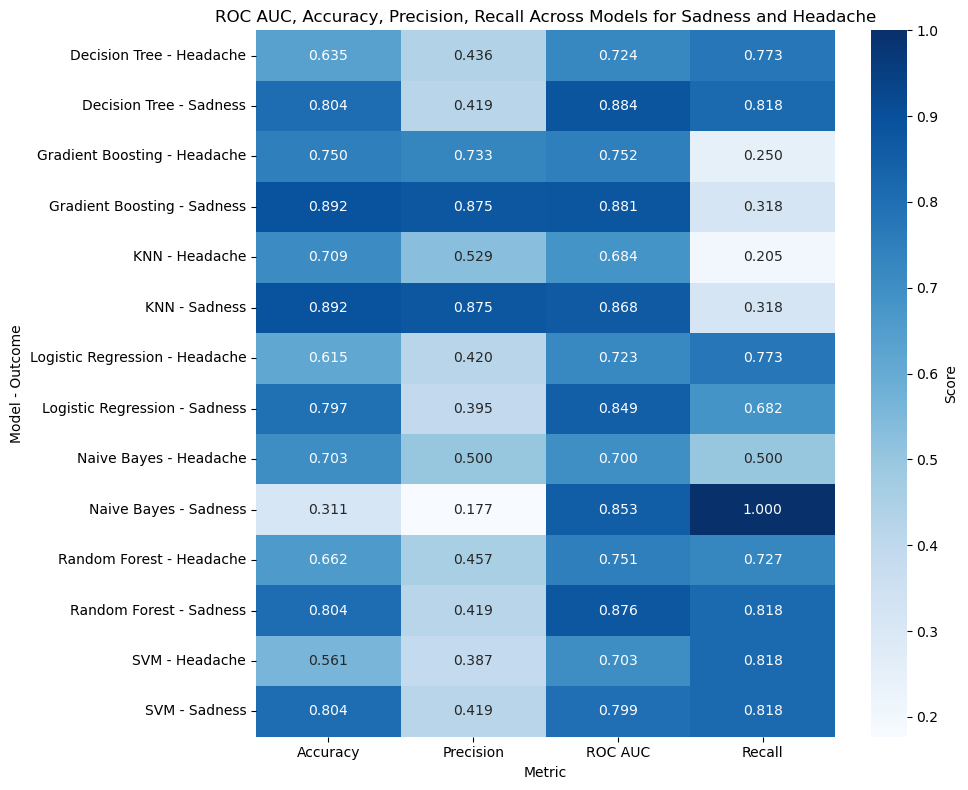

In [104]:
# Heatmap for ROC AUC, Accuracy, Precision, Recall, F1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create structured data
data = [
    # Model, Outcome, ROC AUC, Accuracy, Precision, Recall, F1
    ['Logistic Regression', 'Sadness', 0.849, 0.797, 0.395, 0.682, 0.500],
    ['Logistic Regression', 'Headache', 0.723, 0.615, 0.420, 0.773, 0.544],
    ['Random Forest', 'Sadness', 0.876, 0.804, 0.419, 0.818, 0.554],
    ['Random Forest', 'Headache', 0.751, 0.662, 0.457, 0.727, 0.561],
    ['Gradient Boosting', 'Sadness', 0.881, 0.892, 0.875, 0.318, 0.467],
    ['Gradient Boosting', 'Headache', 0.752, 0.750, 0.733, 0.250, 0.373],
    ['SVM', 'Sadness', 0.799, 0.804, 0.419, 0.818, 0.554],
    ['SVM', 'Headache', 0.703, 0.561, 0.387, 0.818, 0.526],
    ['Decision Tree', 'Sadness', 0.884, 0.804, 0.419, 0.818, 0.554],
    ['Decision Tree', 'Headache', 0.724, 0.635, 0.436, 0.773, 0.557],
    ['Naive Bayes', 'Sadness', 0.853, 0.311, 0.177, 1.000, 0.301],
    ['Naive Bayes', 'Headache', 0.700, 0.703, 0.500, 0.500, 0.500],
    ['KNN', 'Sadness', 0.868, 0.892, 0.875, 0.318, 0.467],
    ['KNN', 'Headache', 0.684, 0.709, 0.529, 0.205, 0.295]
]

# Convert to DataFrame
df_metrics = pd.DataFrame(data, columns=['Model', 'Outcome', 'ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Filter only required metrics
df_melted = df_metrics.melt(id_vars=['Model', 'Outcome'], value_vars=['ROC AUC', 'Accuracy', 'Precision', 'Recall'],
                            var_name='Metric', value_name='Value')

# Create combined label for y-axis
df_melted['Model_Outcome'] = df_melted['Model'] + ' - ' + df_melted['Outcome']

# Pivot for heatmap (Models on y-axis, Metrics on x-axis)
heatmap_df = df_melted.pivot(index='Model_Outcome', columns='Metric', values='Value')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, fmt=".3f", cmap='Blues', cbar_kws={'label': 'Score'})
plt.title('ROC AUC, Accuracy, Precision, Recall Across Models for Sadness and Headache')
plt.xlabel('Metric')
plt.ylabel('Model - Outcome')
plt.tight_layout()
plt.show()

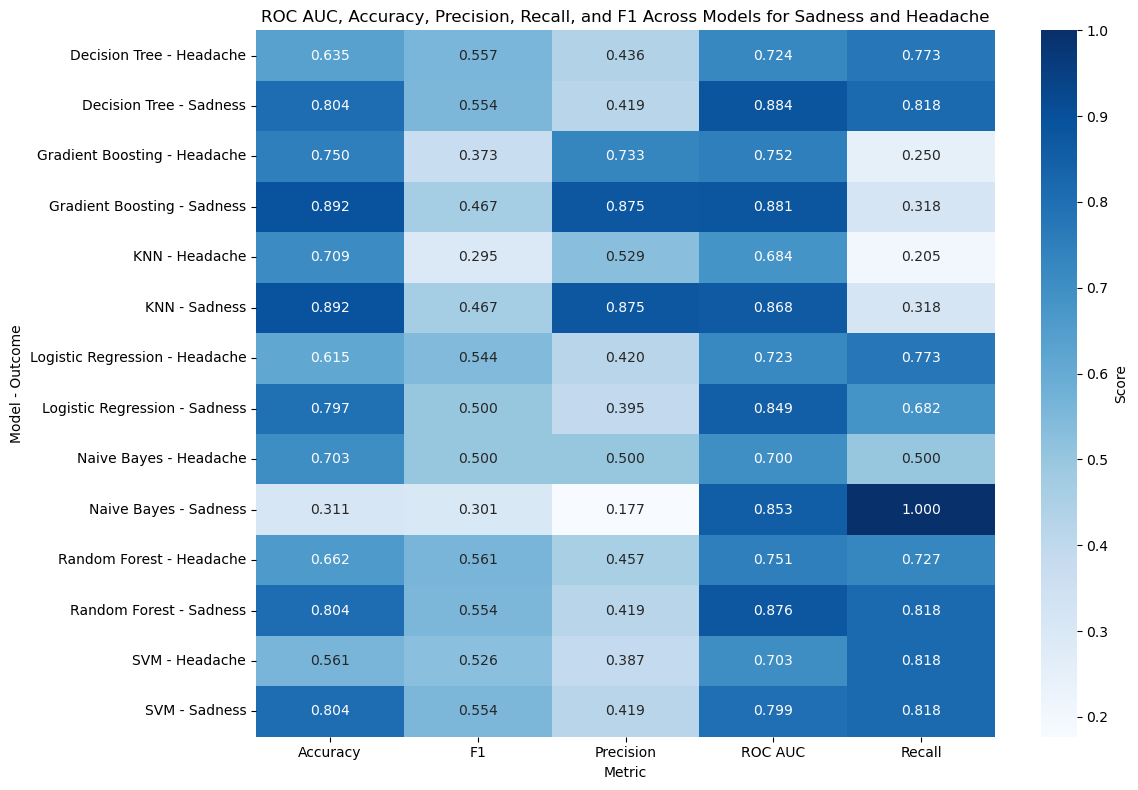

In [105]:
# Add F1 Score to the previous heatmap for complete metric comparison

# Melt with F1 included
df_melted_f1 = df_metrics.melt(
    id_vars=['Model', 'Outcome'],
    value_vars=['ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1'],
    var_name='Metric',
    value_name='Value'
)

# Create combined label for y-axis
df_melted_f1['Model_Outcome'] = df_melted_f1['Model'] + ' - ' + df_melted_f1['Outcome']

# Pivot for heatmap
heatmap_df_f1 = df_melted_f1.pivot(index='Model_Outcome', columns='Metric', values='Value')

# Plot heatmap with F1 included
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df_f1, annot=True, fmt=".3f", cmap='Blues', cbar_kws={'label': 'Score'})
plt.title('ROC AUC, Accuracy, Precision, Recall, and F1 Across Models for Sadness and Headache')
plt.xlabel('Metric')
plt.ylabel('Model - Outcome')
plt.tight_layout()
plt.show()


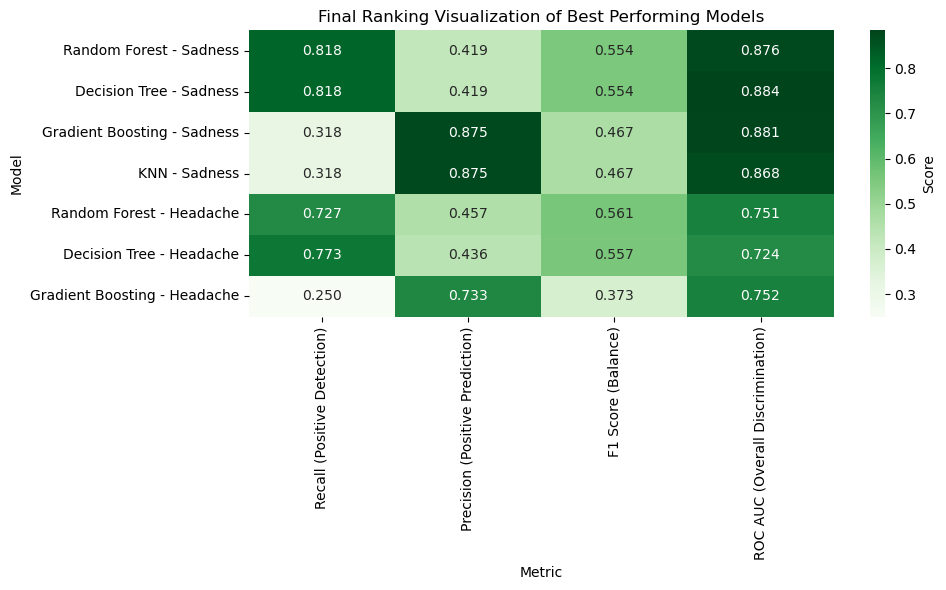

In [106]:
# Create a final ranking visualization summarizing model strengths 

import matplotlib.pyplot as plt

# Create ranking data based on best metric performance
ranking_data = {
    'Model': [
        'Random Forest - Sadness', 'Decision Tree - Sadness',
        'Gradient Boosting - Sadness', 'KNN - Sadness',
        'Random Forest - Headache', 'Decision Tree - Headache',
        'Gradient Boosting - Headache'
    ],
    'Recall (Positive Detection)': [0.818, 0.818, 0.318, 0.318, 0.727, 0.773, 0.250],
    'Precision (Positive Prediction)': [0.419, 0.419, 0.875, 0.875, 0.457, 0.436, 0.733],
    'F1 Score (Balance)': [0.554, 0.554, 0.467, 0.467, 0.561, 0.557, 0.373],
    'ROC AUC (Overall Discrimination)': [0.876, 0.884, 0.881, 0.868, 0.751, 0.724, 0.752]
}

# Convert to DataFrame
df_ranking = pd.DataFrame(ranking_data)
df_ranking = df_ranking.set_index('Model')

# Plot heatmap for ranking
plt.figure(figsize=(10, 6))
sns.heatmap(df_ranking, annot=True, cmap='Greens', fmt=".3f", cbar_kws={'label': 'Score'})
plt.title('Final Ranking Visualization of Best Performing Models')
plt.ylabel('Model')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()

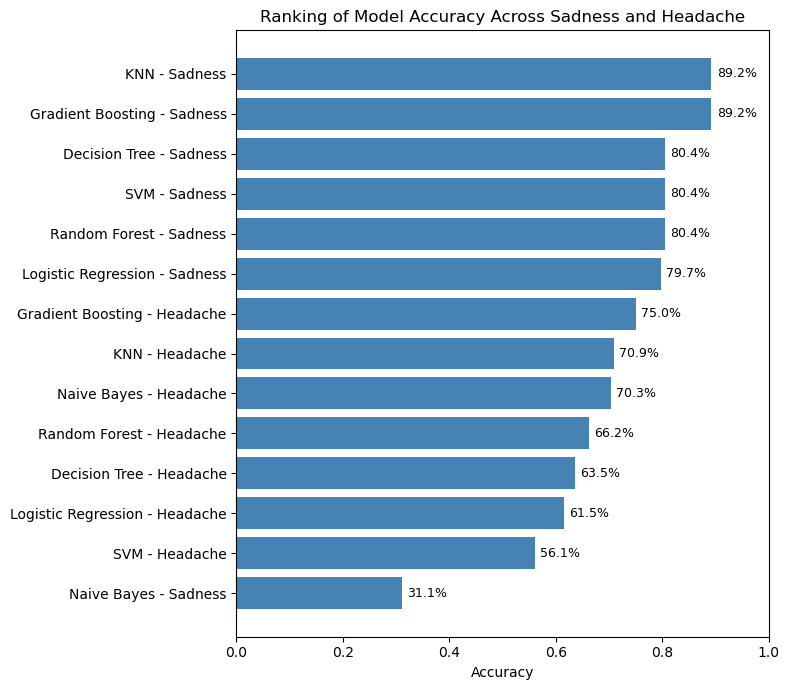

In [125]:
# Generate the ranking bar plot of accuracies with **percentage labels** for clean reporting and slides

import pandas as pd
import matplotlib.pyplot as plt

# Data as provided
data = [
    ['Logistic Regression', 'Sadness', 0.849, 0.797, 0.395, 0.682, 0.500],
    ['Logistic Regression', 'Headache', 0.723, 0.615, 0.420, 0.773, 0.544],
    ['Random Forest', 'Sadness', 0.876, 0.804, 0.419, 0.818, 0.554],
    ['Random Forest', 'Headache', 0.751, 0.662, 0.457, 0.727, 0.561],
    ['Gradient Boosting', 'Sadness', 0.881, 0.892, 0.875, 0.318, 0.467],
    ['Gradient Boosting', 'Headache', 0.752, 0.750, 0.733, 0.250, 0.373],
    ['SVM', 'Sadness', 0.799, 0.804, 0.419, 0.818, 0.554],
    ['SVM', 'Headache', 0.703, 0.561, 0.387, 0.818, 0.526],
    ['Decision Tree', 'Sadness', 0.884, 0.804, 0.419, 0.818, 0.554],
    ['Decision Tree', 'Headache', 0.724, 0.635, 0.436, 0.773, 0.557],
    ['Naive Bayes', 'Sadness', 0.853, 0.311, 0.177, 1.000, 0.301],
    ['Naive Bayes', 'Headache', 0.700, 0.703, 0.500, 0.500, 0.500],
    ['KNN', 'Sadness', 0.868, 0.892, 0.875, 0.318, 0.467],
    ['KNN', 'Headache', 0.684, 0.709, 0.529, 0.205, 0.295]
]

# Create DataFrame
df_metrics = pd.DataFrame(data, columns=['Model', 'Outcome', 'ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Create combined label
df_metrics['Model_Outcome'] = df_metrics['Model'] + ' - ' + df_metrics['Outcome']

# Sort by Accuracy
df_metrics_sorted = df_metrics.sort_values(by='Accuracy', ascending=True)

# Plot with labels
plt.figure(figsize=(8, 7))
bars = plt.barh(df_metrics_sorted['Model_Outcome'], df_metrics_sorted['Accuracy'], color='steelblue')

# Add percentage labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
             f"{width*100:.1f}%", va='center', fontsize=9)

plt.xlabel('Accuracy')
plt.title('Ranking of Model Accuracy Across Sadness and Headache')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

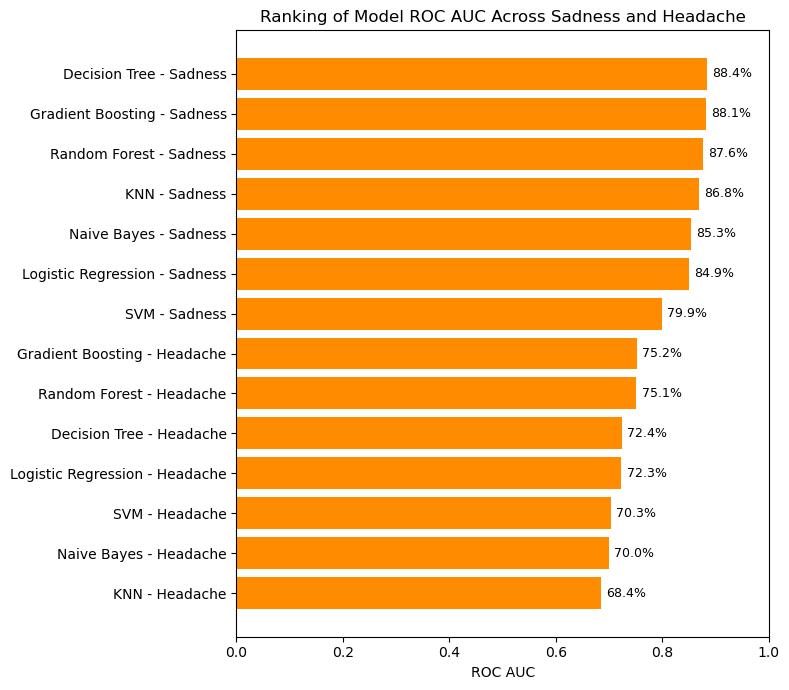

In [126]:
# Generate a **matching ROC AUC ranking plot with percentage labels** for direct manuscript and slide use

import pandas as pd
import matplotlib.pyplot as plt

# Data as provided
data = [
    ['Logistic Regression', 'Sadness', 0.849, 0.797, 0.395, 0.682, 0.500],
    ['Logistic Regression', 'Headache', 0.723, 0.615, 0.420, 0.773, 0.544],
    ['Random Forest', 'Sadness', 0.876, 0.804, 0.419, 0.818, 0.554],
    ['Random Forest', 'Headache', 0.751, 0.662, 0.457, 0.727, 0.561],
    ['Gradient Boosting', 'Sadness', 0.881, 0.892, 0.875, 0.318, 0.467],
    ['Gradient Boosting', 'Headache', 0.752, 0.750, 0.733, 0.250, 0.373],
    ['SVM', 'Sadness', 0.799, 0.804, 0.419, 0.818, 0.554],
    ['SVM', 'Headache', 0.703, 0.561, 0.387, 0.818, 0.526],
    ['Decision Tree', 'Sadness', 0.884, 0.804, 0.419, 0.818, 0.554],
    ['Decision Tree', 'Headache', 0.724, 0.635, 0.436, 0.773, 0.557],
    ['Naive Bayes', 'Sadness', 0.853, 0.311, 0.177, 1.000, 0.301],
    ['Naive Bayes', 'Headache', 0.700, 0.703, 0.500, 0.500, 0.500],
    ['KNN', 'Sadness', 0.868, 0.892, 0.875, 0.318, 0.467],
    ['KNN', 'Headache', 0.684, 0.709, 0.529, 0.205, 0.295]
]

# Create DataFrame
df_metrics = pd.DataFrame(data, columns=['Model', 'Outcome', 'ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Create combined label
df_metrics['Model_Outcome'] = df_metrics['Model'] + ' - ' + df_metrics['Outcome']

# Sort by ROC AUC for ranking
df_metrics_sorted_auc = df_metrics.sort_values(by='ROC AUC', ascending=True)

# Plot with percentage labels
plt.figure(figsize=(8, 7))
bars = plt.barh(df_metrics_sorted_auc['Model_Outcome'], df_metrics_sorted_auc['ROC AUC'], color='darkorange')

# Add percentage labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2,
             f"{width*100:.1f}%", va='center', fontsize=9)

plt.xlabel('ROC AUC')
plt.title('Ranking of Model ROC AUC Across Sadness and Headache')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()